# Final Project – Python for Machine Learning

## Nhóm thực hiện: 9
- Nguyễn Ngọc Hải - Haui-2022605947
- Nguyễn Thành Công - Haui-2022606702 
- Vũ Minh Đức - 11221425
- Nguyễn Hoàng Nguyên - 11224818
- Nguyễn Trọng Vỹ - 11227025

## Chủ đề: ME/CFS vs Depression Classification Dataset

### 1. Giới thiệu và lựa chọn dữ liệu
#### 1.1. Nguồn gốc
- Tập dữ liệu được lấy từ trang web Kaggle.com


#### 1.2. Mô tả chung về bộ dữ liệu, định hướng thực hiện
##### 1.2.1. Mô tả chung về bộ dữ liệu
- Bộ dữ liệu này được thiết kế để giúp các nhà nghiên cứu và chuyên gia học máy khám phá nhiệm vụ đầy thách thức là chẩn đoán phân biệt giữa Hội chứng mệt mỏi mãn tính/Viêm não tủy cơ (ME/CFS) và Trầm cảm.

- Dữ liệu được tổng hợp nhưng được mô phỏng theo các đặc điểm lâm sàng thực tế như mức độ mệt mỏi, điểm trầm cảm, chất lượng giấc ngủ, triệu chứng nhận thức và các yếu tố lối sống. Dữ liệu bao gồm nhiễu thực tế và các giá trị bị thiếu để mô phỏng các tình trạng bệnh lý được tìm thấy trong các tập dữ liệu y tế thực tế.

- Tất cả các tính năng đều được tạo ra bằng logic lấy cảm hứng từ lâm sàng để đảm bảo các mẫu có ý nghĩa cho việc đào tạo và phân tích mô hình.
##### 1.2.2. Định hướng thực hiện
- Khám phá tổng quan dữ liệu
- Thống kê mô tả dữ liệu categorical, numerical
- Trực quan hóa dữ liệu
- Nhận xét và kết luận

#### 1.3. Đọc dữ liệu và khám phá tổng quan

In [1]:
#khai báo thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("me_cfs_vs_depression_dataset.csv") #lấy dữ liệu từ dataset vào dataframe

FileNotFoundError: [Errno 2] No such file or directory: 'me_cfs_vs_depression_dataset.csv'

In [23]:
df.sample(5) #xem 5 dòng dữ liệu ngẫu nhiên

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
13,70,Female,9.1,8.4,4.6,5.0,9.0,7.0,41.0,4.9,1,Not working,Medium,Daily,Yes,ME/CFS
591,68,Female,2.7,6.8,4.1,1.4,9.0,8.3,22.0,9.2,1,Working,High,Rarely,Yes,ME/CFS
880,56,Male,3.5,1.6,3.7,6.0,18.0,4.2,21.0,8.3,0,Partially working,Low,Never,Yes,Depression
679,56,Female,5.6,7.6,6.1,3.9,10.0,5.0,38.0,3.1,0,Working,High,Often,Yes,Depression
341,21,Female,4.1,3.9,8.3,1.5,10.0,6.2,35.0,8.0,0,Partially working,Very high,Often,Yes,Depression


In [24]:
df.info() #xem thông tin tổng quát của dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1000 non-null   int64  
 1   gender                        1000 non-null   object 
 2   sleep_quality_index           953 non-null    float64
 3   brain_fog_level               952 non-null    float64
 4   physical_pain_score           966 non-null    float64
 5   stress_level                  952 non-null    float64
 6   depression_phq9_score         978 non-null    float64
 7   fatigue_severity_scale_score  979 non-null    float64
 8   pem_duration_hours            976 non-null    float64
 9   hours_of_sleep_per_night      979 non-null    float64
 10  pem_present                   1000 non-null   int64  
 11  work_status                   953 non-null    object 
 12  social_activity_level         960 non-null    object 
 13  exer

Nhận thấy tập dữ liệu có:
-  1000 dòng
- 16 cột gồm: 10 cột dạng numerical, 6 cột dạng categorical
- Hầu hết các cột đều có những dòng dữ liệu NaN ngoại trừ các cột age, gender, pem_present, diagnosis

2 loại dữ liệu

In [25]:
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

Số dòng đầy đủ dữ liệu

In [ ]:
df.dropna().shape[0]

670

In [27]:
df.describe() #xem mô tả các cột dữ liệu numerical của tập dữ liệu

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present
count,1000.000000,953.000000,952.000000,966.000000,952.000000,978.000000,979.000000,976.000000,979.000000,1000.000000
mean,44.385000,5.468625,5.611765,5.521843,5.459139,12.268916,6.407252,23.105533,6.571297,0.599000
std,15.321669,2.571423,2.649316,2.565460,2.566536,6.306588,2.206937,13.823953,2.040320,0.490346
min,18.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,31.750000,3.100000,3.300000,3.325000,3.300000,9.000000,6.300000,11.000000,4.800000,0.000000
50%,45.000000,5.600000,5.800000,5.600000,5.400000,10.000000,7.000000,23.000000,6.600000,1.000000
75%,57.000000,7.700000,7.900000,7.800000,7.700000,16.000000,7.500000,35.000000,8.350000,1.000000
max,70.000000,10.000000,10.000000,10.000000,10.000000,27.000000,10.000000,47.000000,10.000000,1.000000


#### 1.4. Ý nghĩa của các cột dữ liệu

- age                           : Tuổi của bệnh nhân
- gender                        : Giới tính (Nam / Nữ / Khác)
- sleep_quality_index           : Chất lượng giấc ngủ (thang điểm 1–10)
- brain_fog_level               : Mức độ sương mù não (1–10)
- physical_pain_score           : Cường độ đau về thể chất (1–10)
- stress_level                  : Mức độ căng thẳng (1–10)
- depression_phq9_score         : Điểm trầm cảm PHQ-9, 0–27
- fatigue_severity_scale_score  : Thang đo mức độ mệt mỏi (FSS), 0–10
- pem_duration_hours            : Thời lượng của PEM tính bằng giờ
- hours_of_sleep_per_night      : Thời gian ngủ trung bình mỗi đêm
- pem_present                   : Có tình trạng mệt mỏi sau gắng sức (PEM) hay không (Có/Không hoặc 1/0)
- work_status                   : Tình trạng công việc: Đang làm việc / Đang làm việc bán thời gian / Không làm việc
- social_activity_level         : Hoạt động xã hội: Rất thấp – Rất cao
- exercise_frequency            : Tần suất tập thể dục: Không bao giờ – Hàng ngày
- meditation_or_mindfulness     : Bệnh nhân có thực hành chánh niệm hoặc thiền định không? Có/Không
- diagnosis                     : Biến mục tiêu: ME/CFS, Depression, Both

#### 1.5. Các đặc trưng quan trọng
- Chứa missing values (NaN) trong hầu hết các tính năng (1–5%), mô phỏng các vấn đề thu thập dữ liệu trong thế giới thực.
- Tất cả các tính năng số đều chứa controlled noise để ngăn chặn sự phân tách lớp hoàn hảo.
- Logic chẩn đoán dựa trên clinical-like heuristics, phù hợp với các mô hình đào tạo có thể hỗ trợ các quyết định trong thế giới thực.

#### 1.6. Vấn đề có thể giải quyết bằng học máy
- Phân loại nhị phân: ME/CFS so với Depression
- Phân loại đa lớp: ME/CFS, Depression, Both


### 2. Thực hiện thống kê mô tả
- Thực hiện thống kê trên các dữ liệu dạng categorical.
- Thực hiện thống kê trên các dữ liệu dạng numerical.
- Tính toán thống kê mô tả.
Với mỗi kết quả thu được, mô tả kết quả và nhận xét.

#### 2.1. Thực hiện thống kê trên các dữ liệu dạng categorical

In [28]:
# --- 1. Tạo bảng tóm tắt tổng quan cho tất cả các cột categorical ---
summary_data = []
for col in categorical_columns:
    if col in df.columns:
        null_count = df[col].isnull().sum()
        total_count = len(df)
        not_null_count = df[col].count()
        unique_types = df[col].nunique()
        summary_data.append({
            'Column Name': col,
            'Total Rows': total_count,
            'Null Count': null_count,
            'Non-Null Count': not_null_count,
            'Unique Types': unique_types
        })
    else:
        summary_data.append({
            'Column Name': col,
            'Total Rows': len(df),
            'Null Count': 'N/A (Column not found)',
            'Non-Null Count': 'N/A (Column not found)',
            'Unique Types': 'N/A (Column not found)'
        })

summary_df = pd.DataFrame(summary_data)
print("--- Bảng Tóm Tắt Tổng Quan Các Cột Categorical ---")
print(summary_df.to_string(index=False)) 

--- Bảng Tóm Tắt Tổng Quan Các Cột Categorical ---
              Column Name  Total Rows  Null Count  Non-Null Count  Unique Types
                   gender        1000           0            1000             2
              work_status        1000          47             953             3
    social_activity_level        1000          40             960             5
       exercise_frequency        1000          39             961             5
meditation_or_mindfulness        1000          11             989             2
                diagnosis        1000           0            1000             3


In [29]:
# --- 2. Trình bày chi tiết số lượng và phần trăm cho mỗi loại trong từng cột ---
for col in categorical_columns:
    if col in df.columns:
        print(f"=== Chi Tiết Cột: '{col}' ===")
        # Tính toán số lượng và tỷ lệ phần trăm (bao gồm cả NaN nếu có)
        value_counts = df[col].value_counts(dropna=False)
        value_percentages = df[col].value_counts(normalize=True, dropna=False) * 100

        # Tạo DataFrame cho bảng chi tiết của cột hiện tại
        detailed_stats_df = pd.DataFrame({
            'Count': value_counts,
            '%': value_percentages.round(2)
        })
        detailed_stats_df.index.name = 'Category' # Đặt tên cho cột index

        print(detailed_stats_df.to_string()) # to_string() để hiển thị toàn bộ bảng mà không bị cắt
        print("\n" + "-"*50 + "\n") # Dải phân cách giữa các cột chi tiết
    else:
        print(f"=== Chi Tiết Cột: '{col}' (Không tìm thấy) ===")
        print("Cột này không tồn tại trong dataset.")
        print("\n" + "-"*50 + "\n")

print("\n--- Hoàn thành thống kê chi tiết các cột Categorical ---")

=== Chi Tiết Cột: 'gender' ===
          Count     %
Category             
Male        524  52.4
Female      476  47.6

--------------------------------------------------

=== Chi Tiết Cột: 'work_status' ===
                   Count     %
Category                      
Partially working    335  33.5
Working              320  32.0
Not working          298  29.8
NaN                   47   4.7

--------------------------------------------------

=== Chi Tiết Cột: 'social_activity_level' ===
           Count     %
Category              
Very low     203  20.3
High         200  20.0
Low          190  19.0
Very high    186  18.6
Medium       181  18.1
NaN           40   4.0

--------------------------------------------------

=== Chi Tiết Cột: 'exercise_frequency' ===
           Count     %
Category              
Rarely       210  21.0
Often        202  20.2
Daily        194  19.4
Sometimes    184  18.4
Never        171  17.1
NaN           39   3.9

------------------------------------------

#### 2.2. Thực hiện thống kê trên các dữ liệu dạng numerical

In [30]:
# Xác định các cột dạng số
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print("10 cột dạng số để thống kê:", numerical_cols)

10 cột dạng số để thống kê: ['age', 'sleep_quality_index', 'brain_fog_level', 'physical_pain_score', 'stress_level', 'depression_phq9_score', 'fatigue_severity_scale_score', 'pem_duration_hours', 'hours_of_sleep_per_night', 'pem_present']


In [31]:
# Thống kê mô tả cho các cột dạng số
print("Thống kê mô tả cho các cột dạng số:")
numerical_description = df[numerical_cols].describe().round(2)
numerical_description

Thống kê mô tả cho các cột dạng số:


,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present
count,1000.00,953.00,952.00,966.00,952.00,978.00,979.00,976.00,979.00,1000.00
mean,44.38,5.47,5.61,5.52,5.46,12.27,6.41,23.11,6.57,0.60
std,15.32,2.57,2.65,2.57,2.57,6.31,2.21,13.82,2.04,0.49
min,18.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,3.00,0.00
25%,31.75,3.10,3.30,3.32,3.30,9.00,6.30,11.00,4.80,0.00
50%,45.00,5.60,5.80,5.60,5.40,10.00,7.00,23.00,6.60,1.00
75%,57.00,7.70,7.90,7.80,7.70,16.00,7.50,35.00,8.35,1.00
max,70.00,10.00,10.00,10.00,10.00,27.00,10.00,47.00,10.00,1.00



#### 2.3. Nhận xét cụ thể về một số cột(Dự đoán chúng có ảnh hưởng tới biến mục tiêu)
##### Gender
- Cột 'Gender' thể hiện sự phân bố giới tính trong tập dữ liệu.

- Tỷ lệ phần trăm cho mỗi giới tính (Nam/ Nữ) được hiển thị, giúp chúng ta hiểu được sự cân bằng giới tính trong mẫu nghiên cứu.

- Nếu một giới tính chiếm tỷ lệ áp đảo, điều này có thể ảnh hưởng đến khả năng tổng quát hóa kết quả của mô hình cho các nhóm giới tính khác.

##### Age:

- Tuổi trung bình của bệnh nhân là 44.38 tuổi.

- Khoảng tuổi từ 18 đến 70.

- Khả năng quyết định: Tuổi có thể ảnh hưởng đến sự xuất hiện và biểu hiện của cả ME/CFS và Trầm cảm. Một số bệnh lý có xu hướng phổ biến hơn ở một độ tuổi nhất định, hoặc các triệu chứng có thể biểu hiện khác nhau tùy theo nhóm tuổi.

##### Fatigue_Severity_Scale_Score:

- Mức độ mệt mỏi trung bình là 6.41.

- Giá trị nhỏ nhất là 0 và lớn nhất là 10.

- Khả năng quyết định: Mệt mỏi là triệu chứng cốt lõi của ME/CFS và cũng rất phổ biến ở người bị trầm cảm. Mức độ nghiêm trọng của mệt mỏi có thể là một yếu tố phân biệt quan trọng, đặc biệt khi kết hợp với các triệu chứng khác của ME/CFS như mệt mỏi sau gắng sức (PEM).

##### Sleep_Quality_Index:

- Chất lượng giấc ngủ trung bình là 5.47.

- Khoảng giá trị từ 1 đến 10.

- Khả năng quyết định: Rối loạn giấc ngủ là triệu chứng thường gặp ở cả ME/CFS và Trầm cảm. Tuy nhiên, bản chất của rối loạn giấc ngủ có thể khác nhau (ví dụ: mất ngủ do khó đi vào giấc ngủ trong trầm cảm so với giấc ngủ không phục hồi trong ME/CFS). Do đó, chất lượng giấc ngủ có thể là một chỉ báo quan trọng.

In [32]:
# Thống kê cho cột 'Diagnosis' (biến mục tiêu)
print("Thống kê cho cột 'Diagnosis':")
diagnosis_counts = df['diagnosis'].value_counts()
diagnosis_percent= df['diagnosis'].value_counts(normalize=True) * 100
pd.DataFrame({'Count': diagnosis_counts, '%': diagnosis_percent.round(2)})

Thống kê cho cột 'Diagnosis':


,Count,%
diagnosis,,
Depression,401,40.1
ME/CFS,397,39.7
Both,202,20.2


#### Nhận xét về 'Diagnosis'
- Cột 'Diagnosis' là biến mục tiêu, cho biết bệnh nhân mắc ME/CFS hay Trầm cảm.

- Sự phân bố giữa hai nhóm bệnh này rất quan trọng. Nếu một nhóm chiếm tỷ lệ quá lớn so với nhóm kia (mất cân bằng lớp), điều này có thể gây khó khăn cho việc huấn luyện mô hình phân loại hiệu quả, vì mô hình có xu hướng ưu tiên dự đoán lớp chiếm đa số.

### 3. Trực quan hoá dữ liệu 
- Trực quan hóa dữ liệu (histogram, bar chart, scatter plot, box plot,…)
- Phân tích mối quan hệ giữa các thuộc tính
- Rút ra **nhận xét định tính** về dữ liệu để định hướng sử dụng mô hình học máy sau này

#### 3.1. Trực quan hóa dữ liệu

##### Histogram

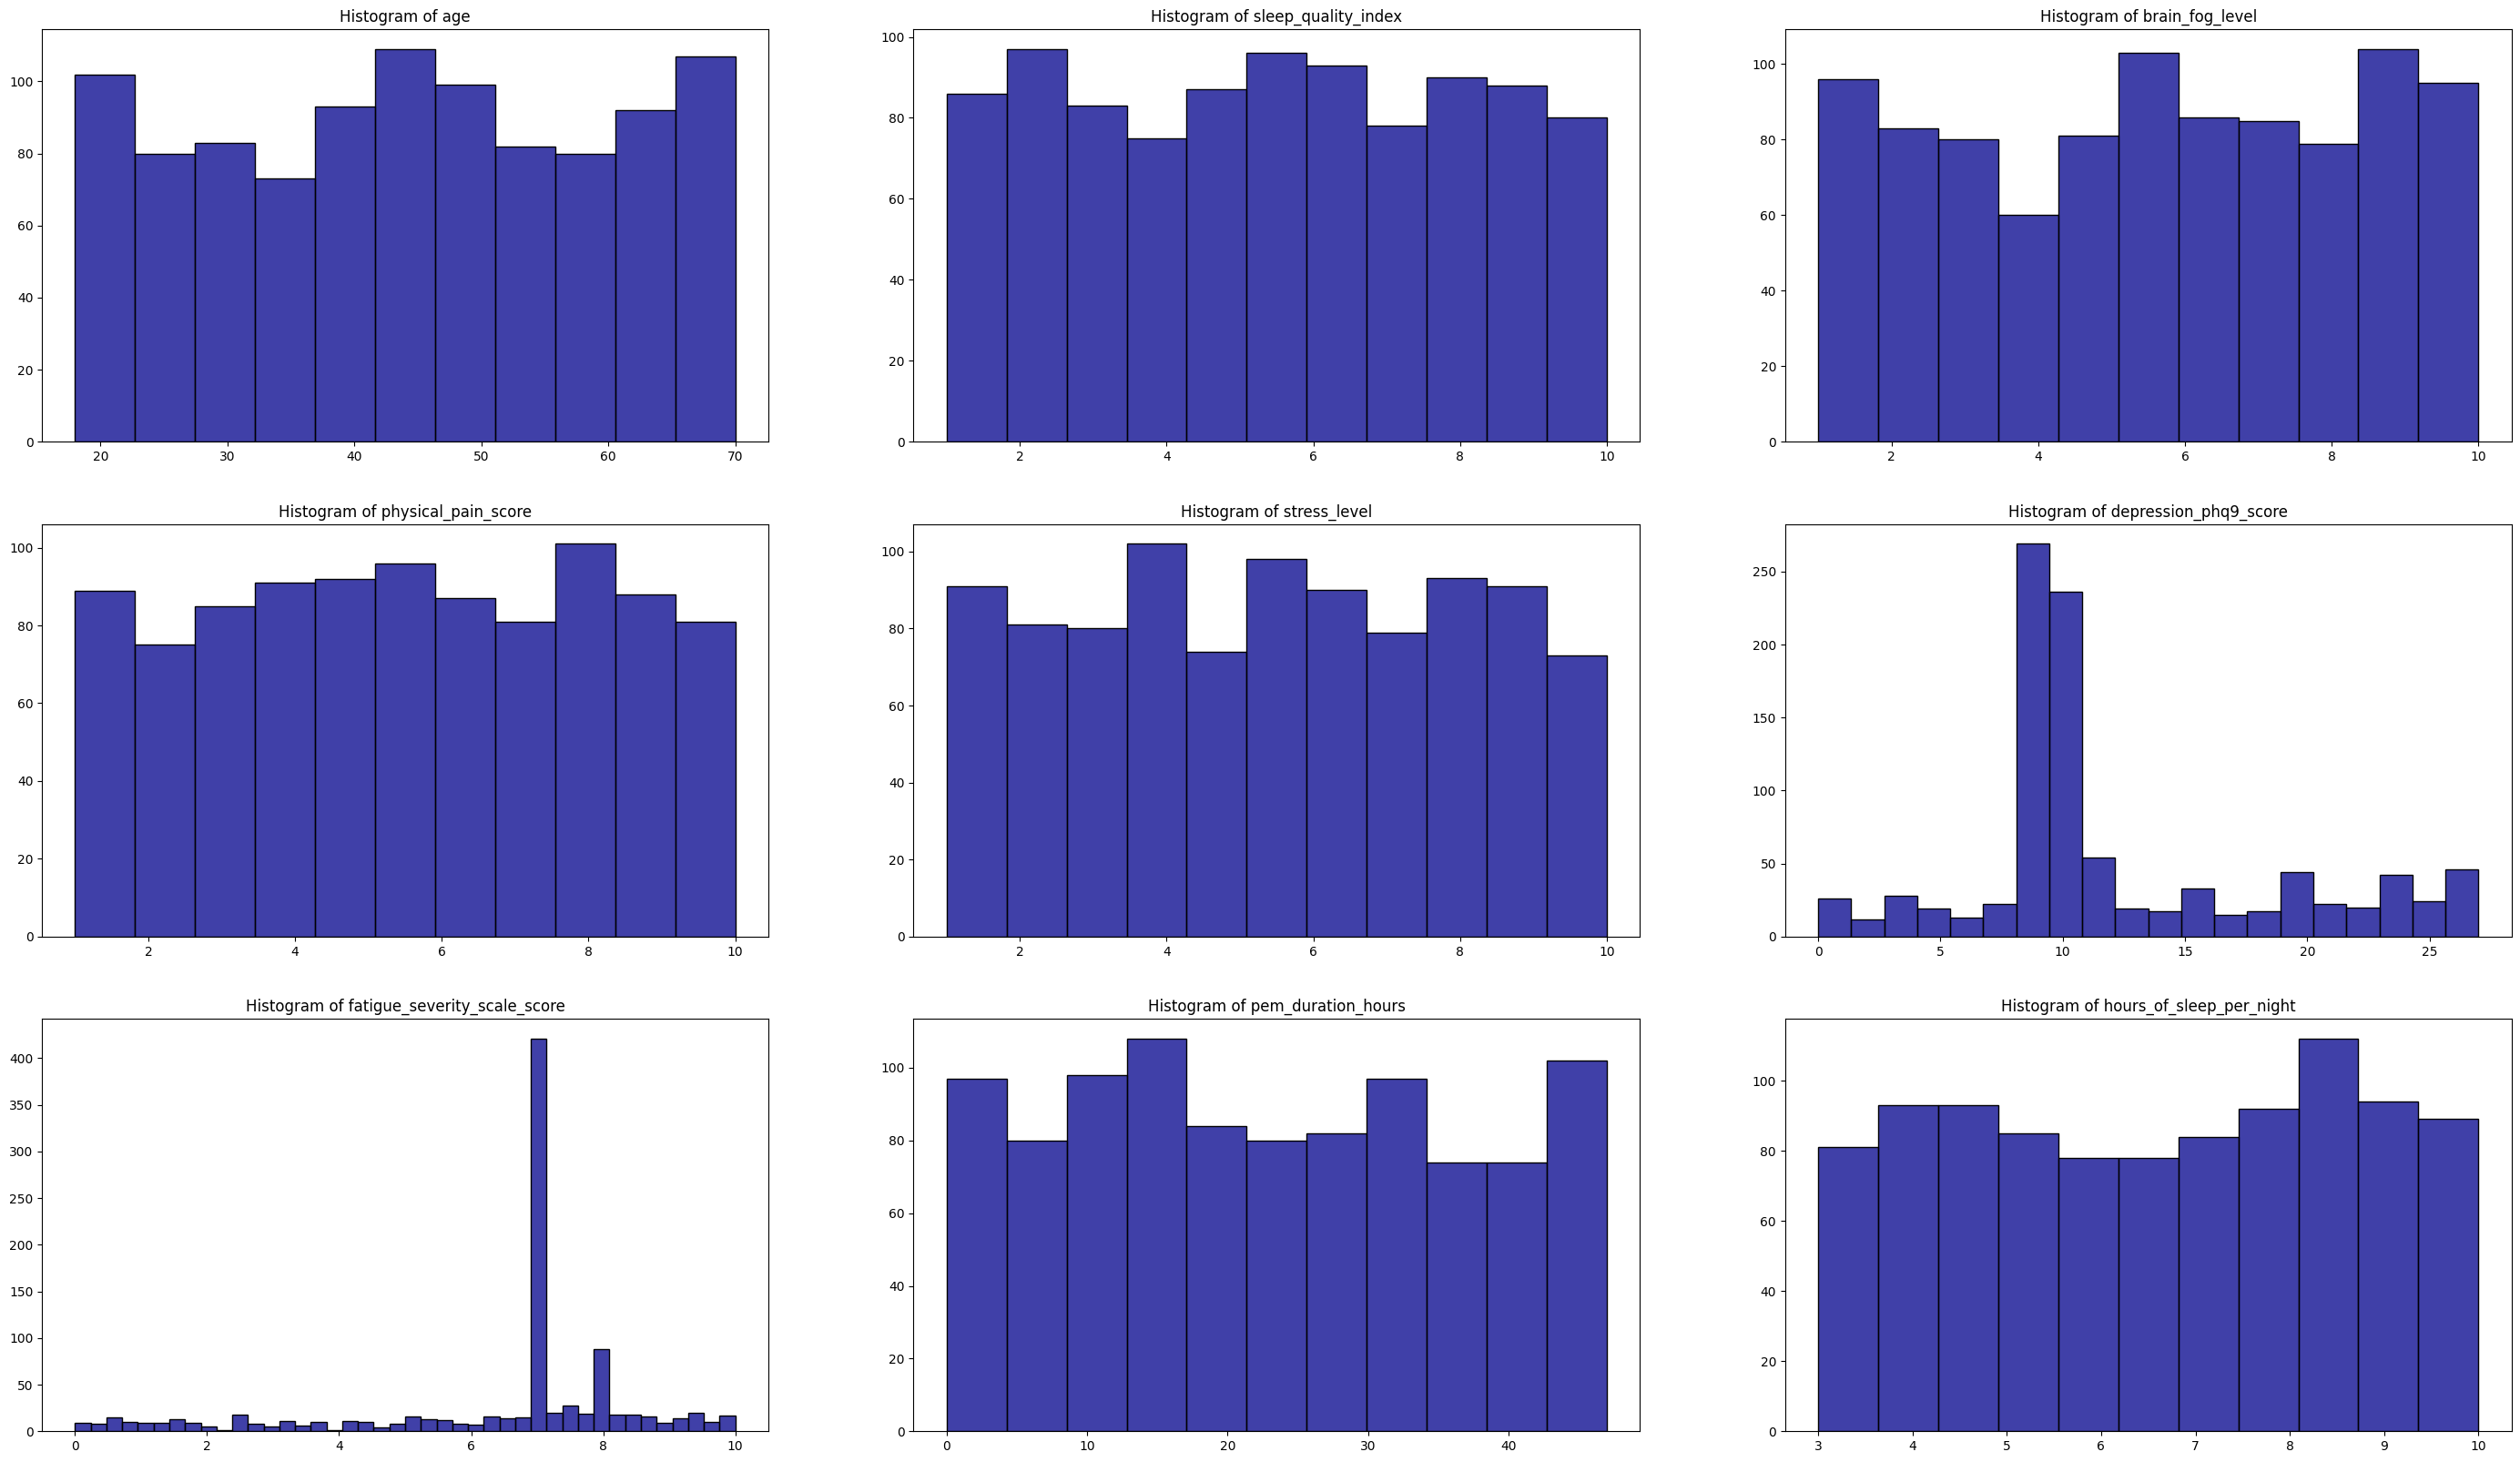

<Figure size 1600x1000 with 0 Axes>

In [36]:
numerical_cols = [
    "age", "sleep_quality_index", "brain_fog_level", "physical_pain_score",
    "stress_level", "depression_phq9_score", "fatigue_severity_scale_score",
    "pem_duration_hours", "hours_of_sleep_per_night"
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(35, 20))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axes[i], color='darkblue')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
plt.figure(figsize=(16, 10))
plt.tight_layout()
plt.show()


Các biến phân bố khá đồng đều ngoại trừ 2 biến sau:
- Depression_phq9_score: Tập trung đa số ở mức điểm 7–10.
- Fatigue_severity_scale_score: Đỉnh tập trung ở mức 7–8.

#### Bar chart

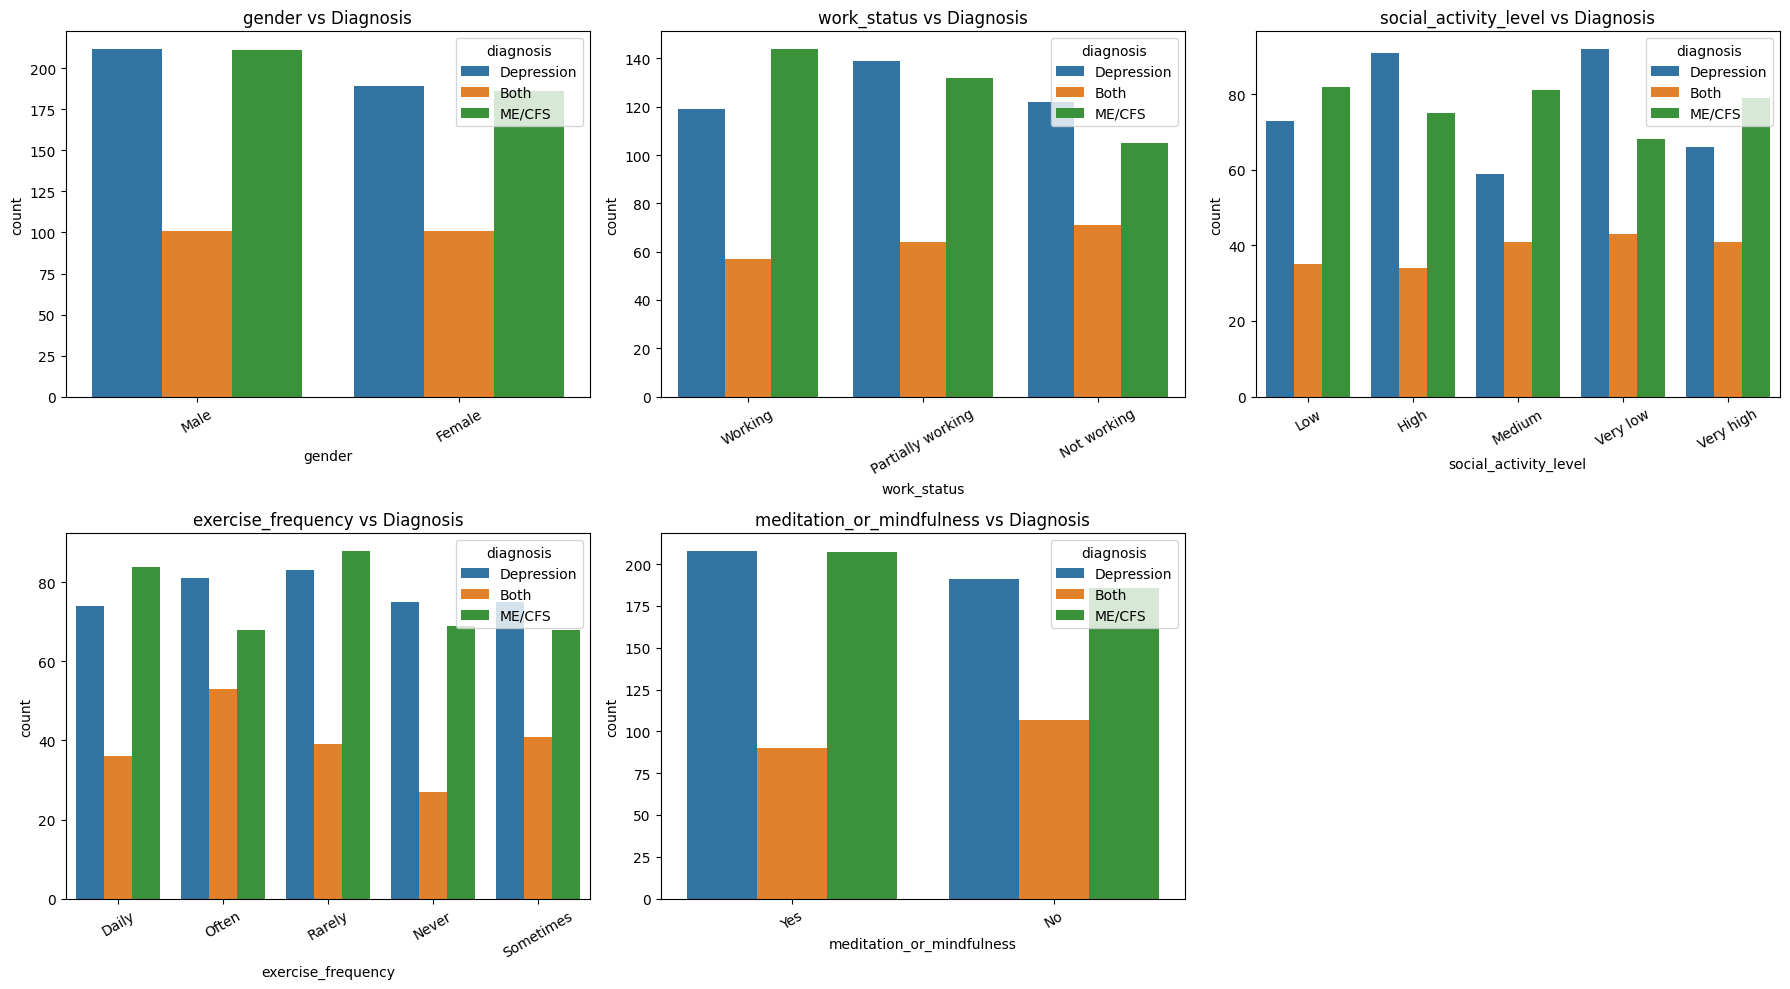

In [37]:
categorical_cols = ['gender', 'work_status', 'social_activity_level', 'exercise_frequency', 'meditation_or_mindfulness']

plt.figure(figsize=(18, 10))

for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=col, hue='diagnosis')
    plt.title(f'{col} vs Diagnosis')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


#### Scatter plot

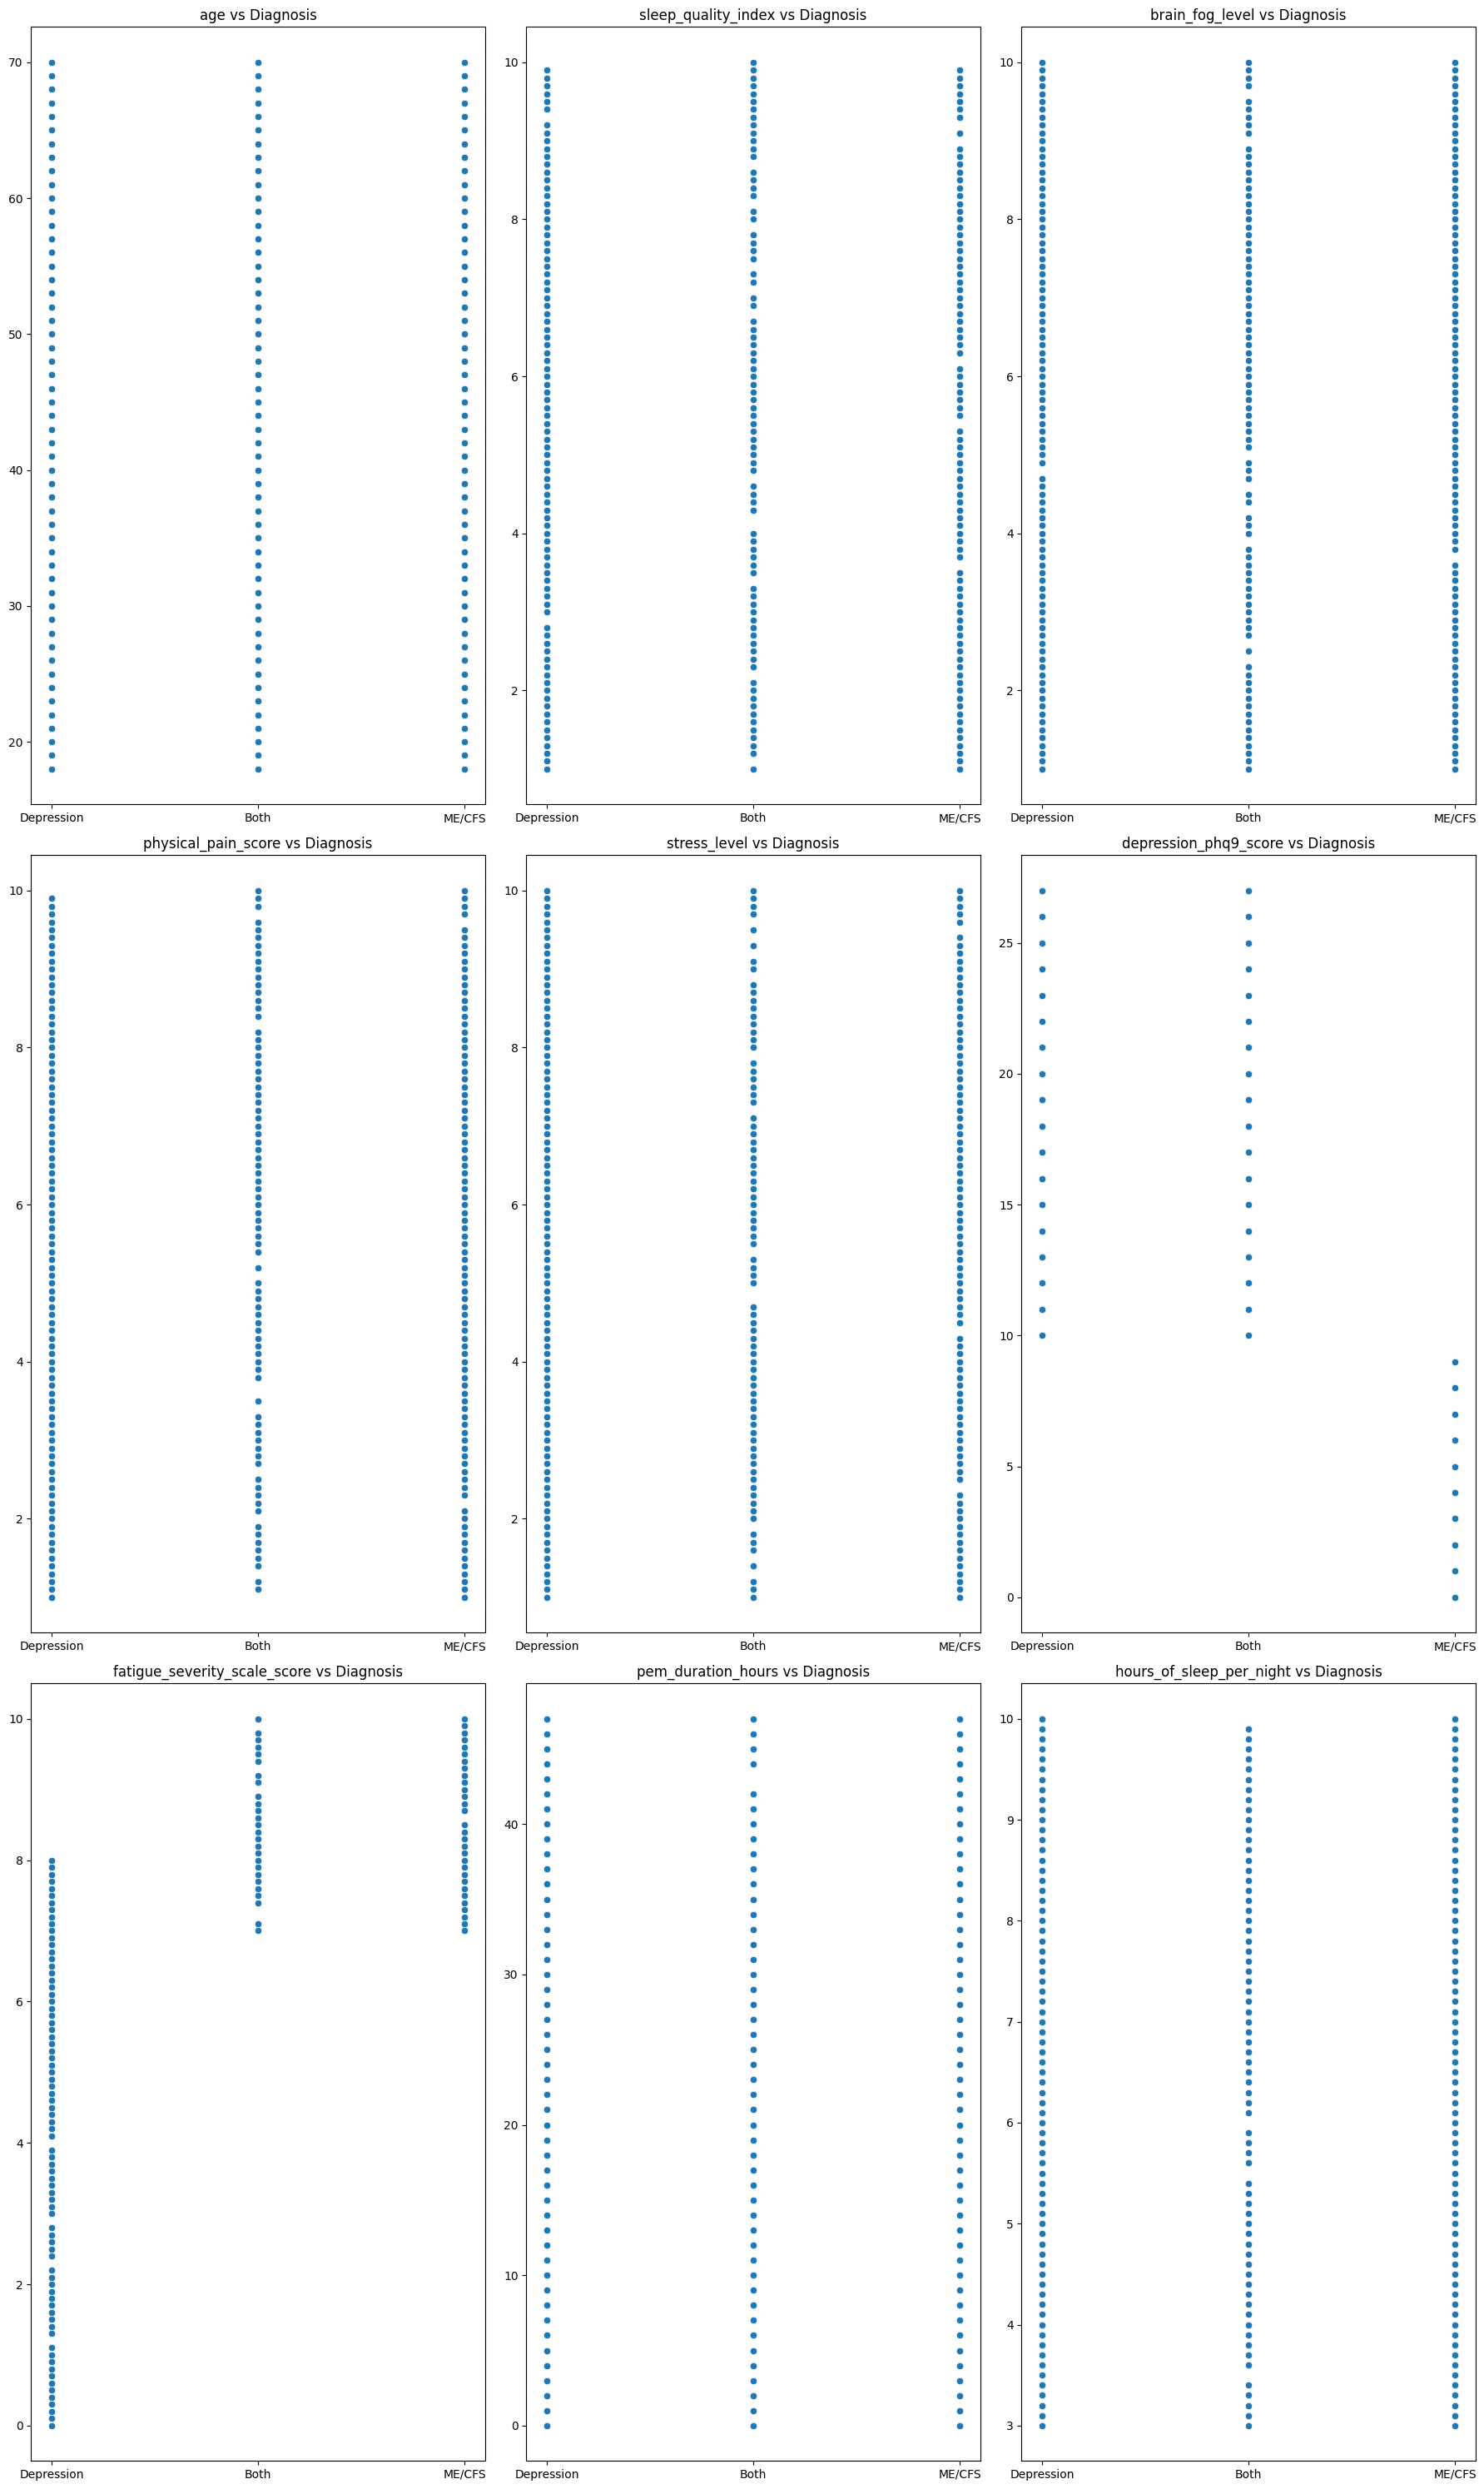

In [38]:
plt.figure(figsize=(18, 30))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(data=df, x='diagnosis', y=col)
    plt.title(f'{col} vs Diagnosis')
    plt.ylabel('')
    plt.xlabel('')
plt.tight_layout()
plt.show()

Đa số các biến phân bố đồng đều, ngoại trừ:
- Depression_phq9_score:  
Depression và Both tập trung ở mức trên 10 điểm  
ME/CFS tập trung từ mức 0-10 điểm
- Fatigue_severity_scale_score: Nhóm ME/CFS có điểm số mệt mỏi cao hơn so với  
Depression tập trung chủ yếu ở mức 0-8 điểm.  
ME/CFS và Both tập trung ở mức 7-10 điểm

#### Boxplot

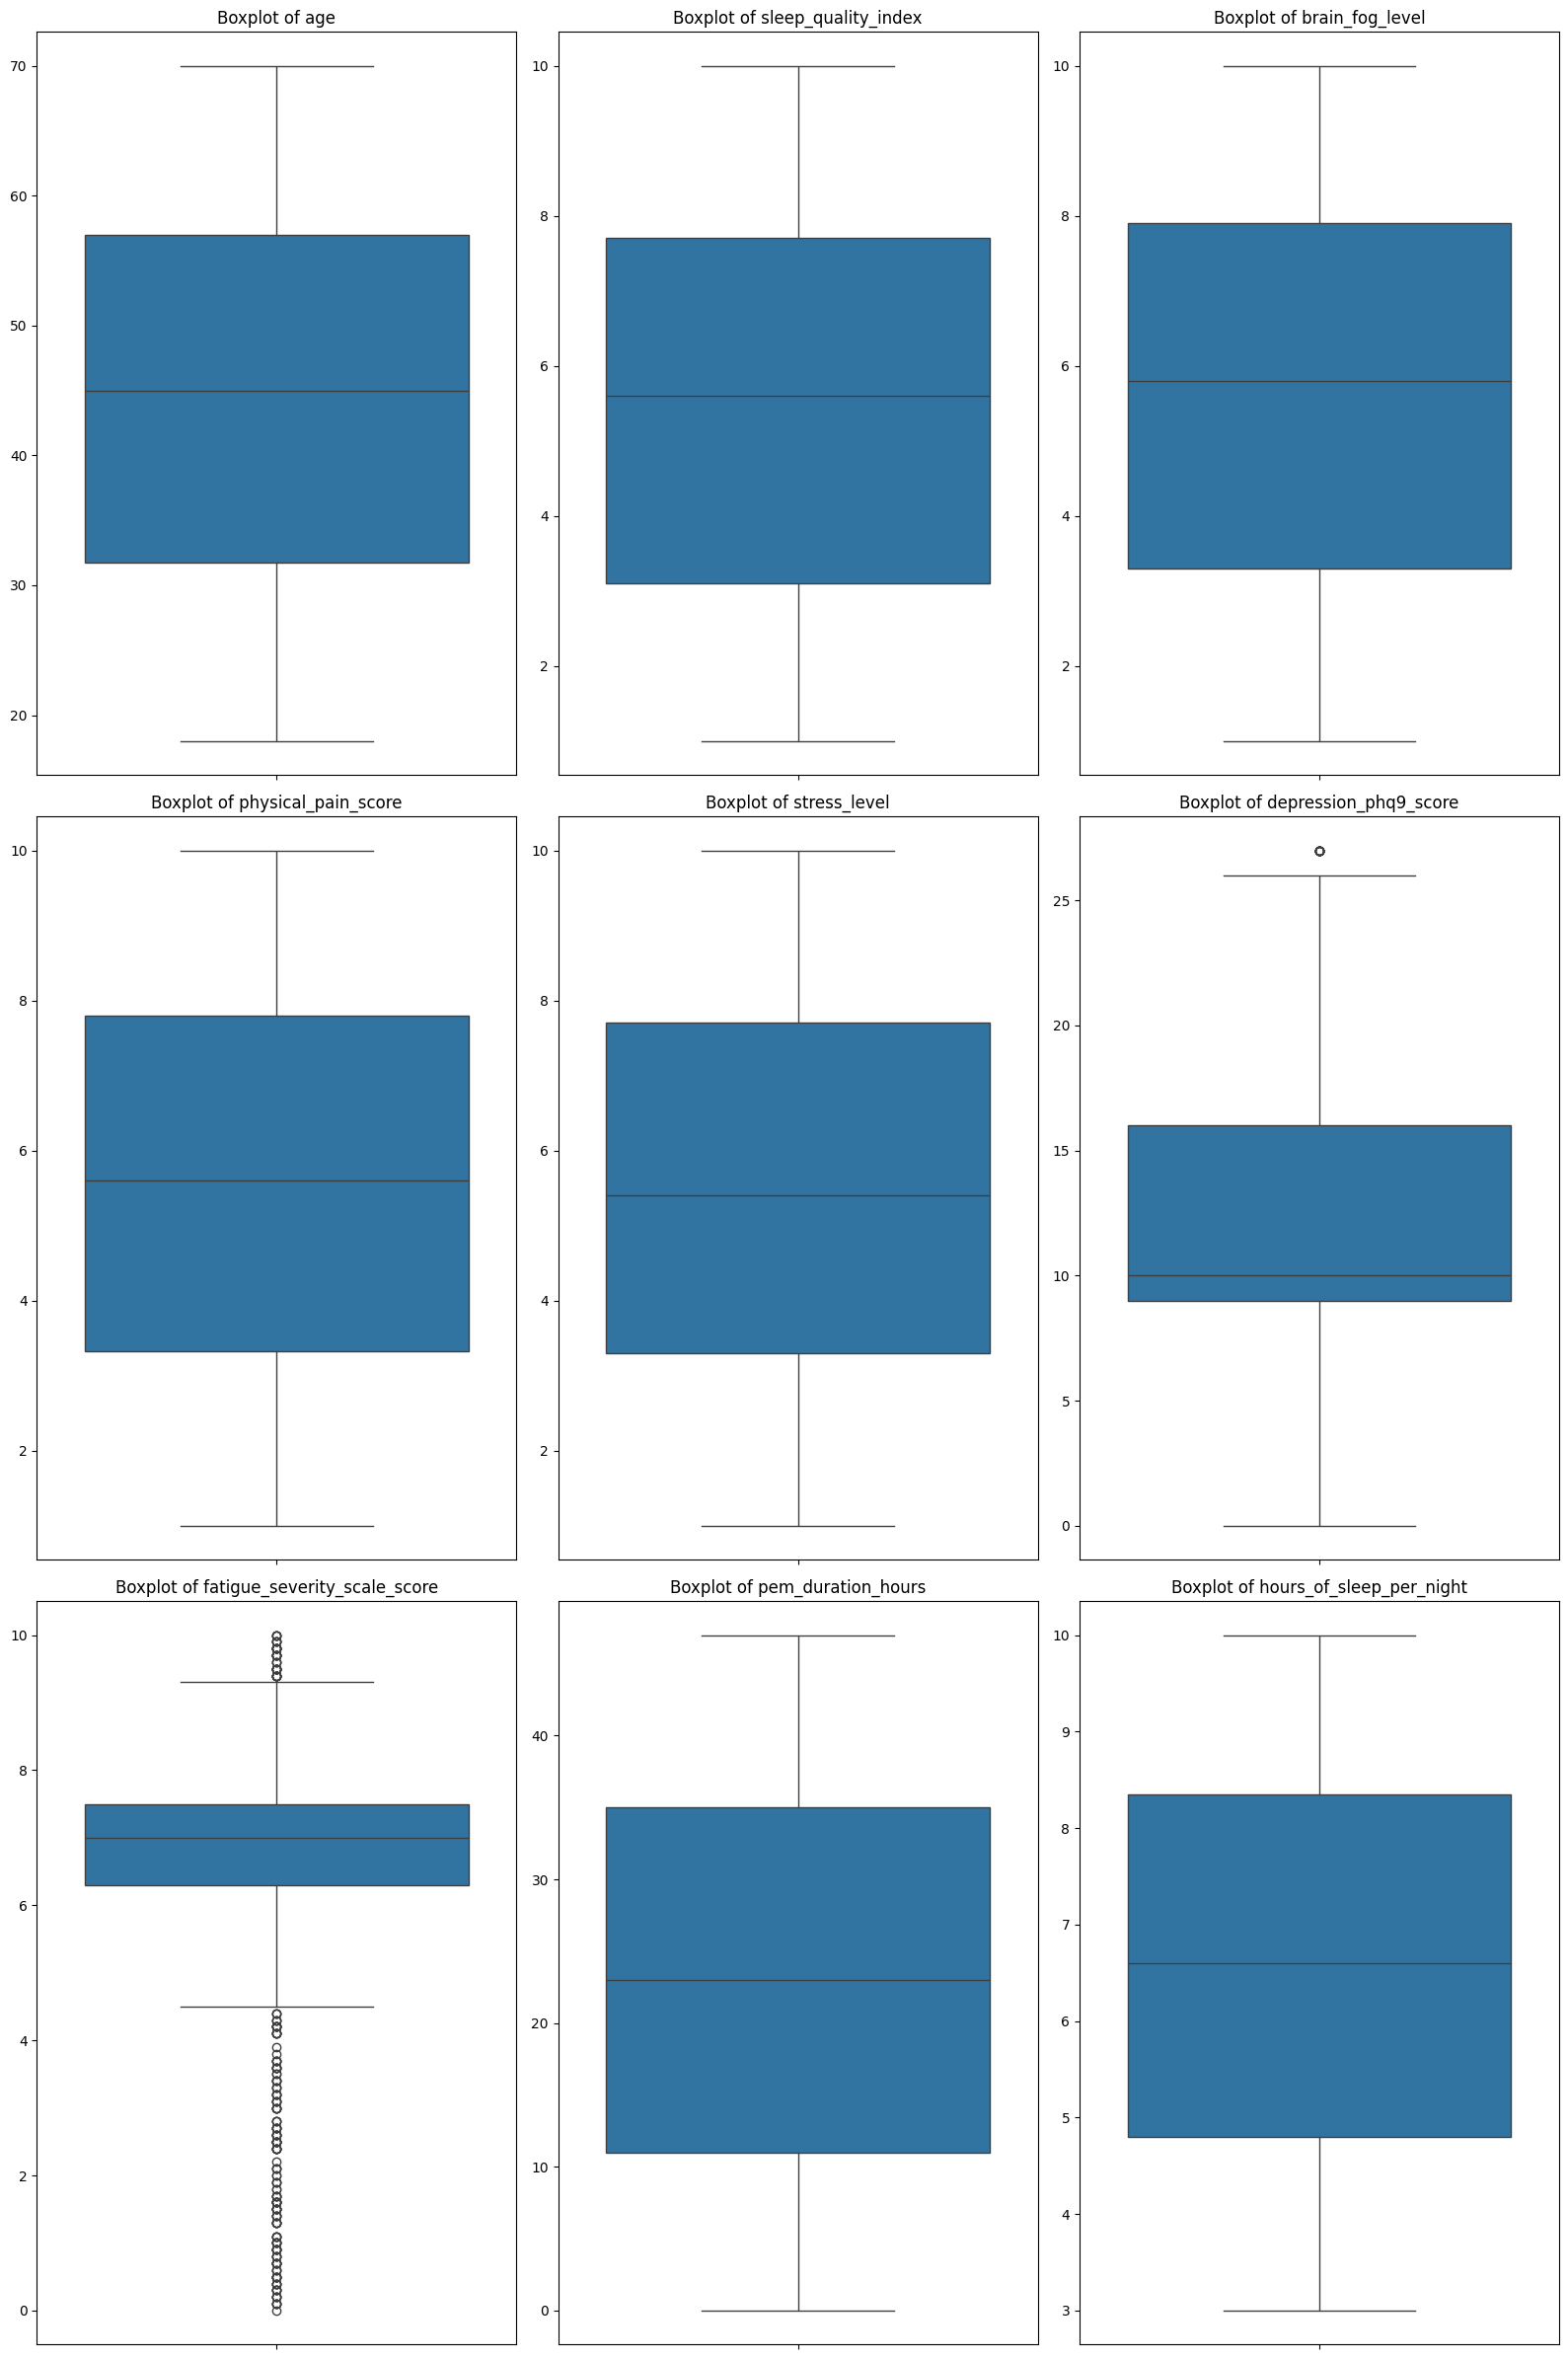

In [39]:
plt.figure(figsize=(16, 24))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

- Depression_phq9_score: Có một số outlier cao vượt trội (~27).
- Fatigue_severity_scale_score: Có rất nhiều outlier

#### 3.2. Phân tích mối quan hệ giữa các thuộc tính

Chọn biến số và cho biết bao nhiêu dòng không có null để tính corr

In [ ]:

df_numeric_cleaned = df[numerical_columns].dropna()
print(f"Số dòng còn lại sau khi drop null trong các cột kiểu số: {len(df_numeric_cleaned)}")


Số dòng còn lại sau khi drop null trong các cột kiểu số: 761


Tương quan giữa các biến số

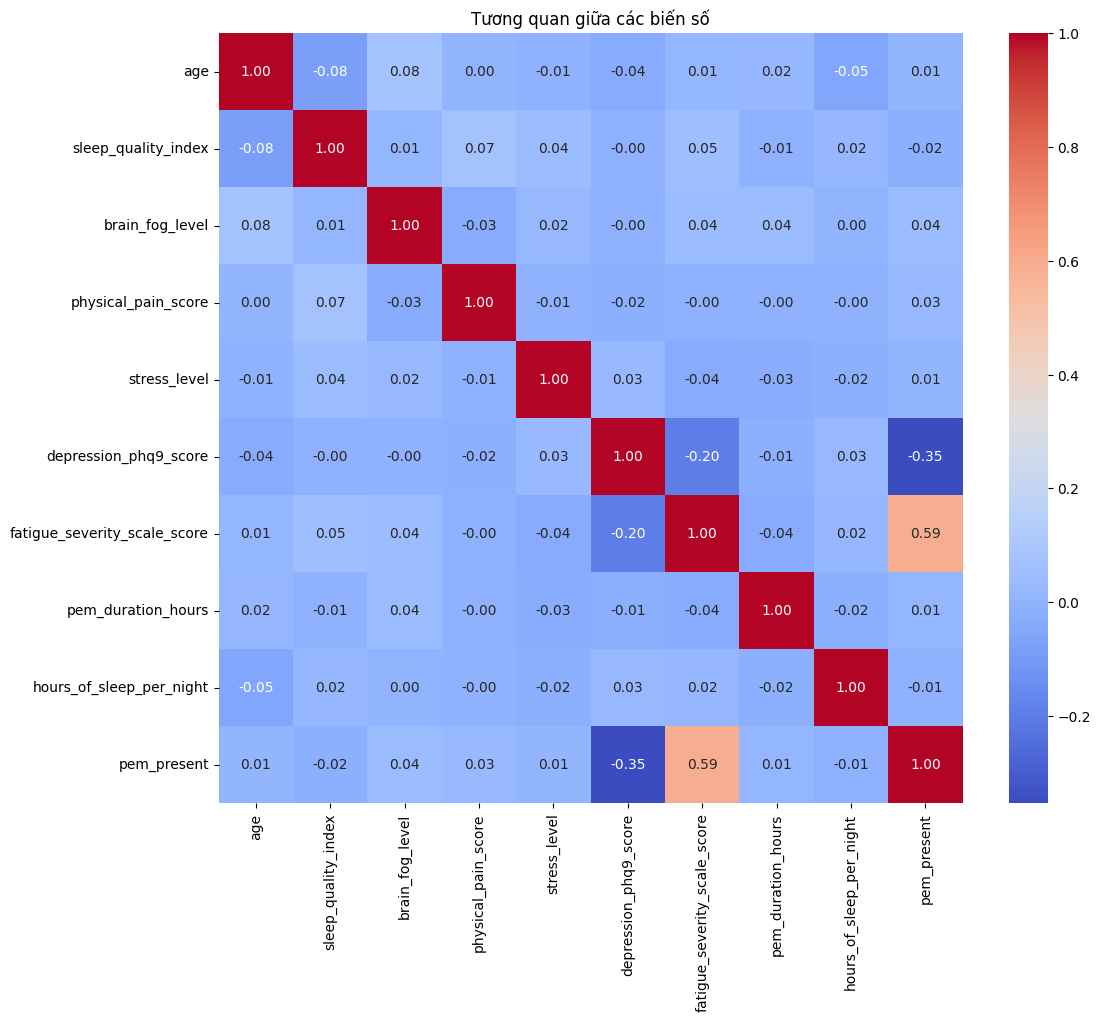

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Tương quan giữa các biến số")
plt.show()

Nhận xét qua biểu đồ tương quan biến số:

- fatigue_severity_scale_score & pem_present(0.59):Tương quan thuận khá mạnh. Người càng mệt mỏi (fatigue) thì khả năng bị PEM (post-exertional malaise) càng cao.

- depression_phq9_score & fatigue_severity_scale_score(-0.20):Tương quan nghịch nhẹ. Tức là mức độ trầm cảm cao có xu hướng liên quan đến mức fatigue thấp hơn.

- depression_phq9_score & pem_present(-0.35):Tương quan nghịch trung bình. Người có điểm trầm cảm cao thì khả năng bị PEM lại giảm .

- Các độ tương quan khác thì khoảng -0.08 đến 0.02 nên hầu như không có ảnh hưởng đáng kể đến các biến còn lại.




Tương quan giữa các biến số với biến target

C:\Users\admin\AppData\Local\Temp\ipykernel_25648\634843516.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diagnosis', y=col, ax=axes[i], palette='pastel')
C:\Users\admin\AppData\Local\Temp\ipykernel_25648\634843516.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diagnosis', y=col, ax=axes[i], palette='pastel')
C:\Users\admin\AppData\Local\Temp\ipykernel_25648\634843516.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diagnosis', y=col, ax=axes[i], palette='pastel')
C:\Users\admin\AppData\Local

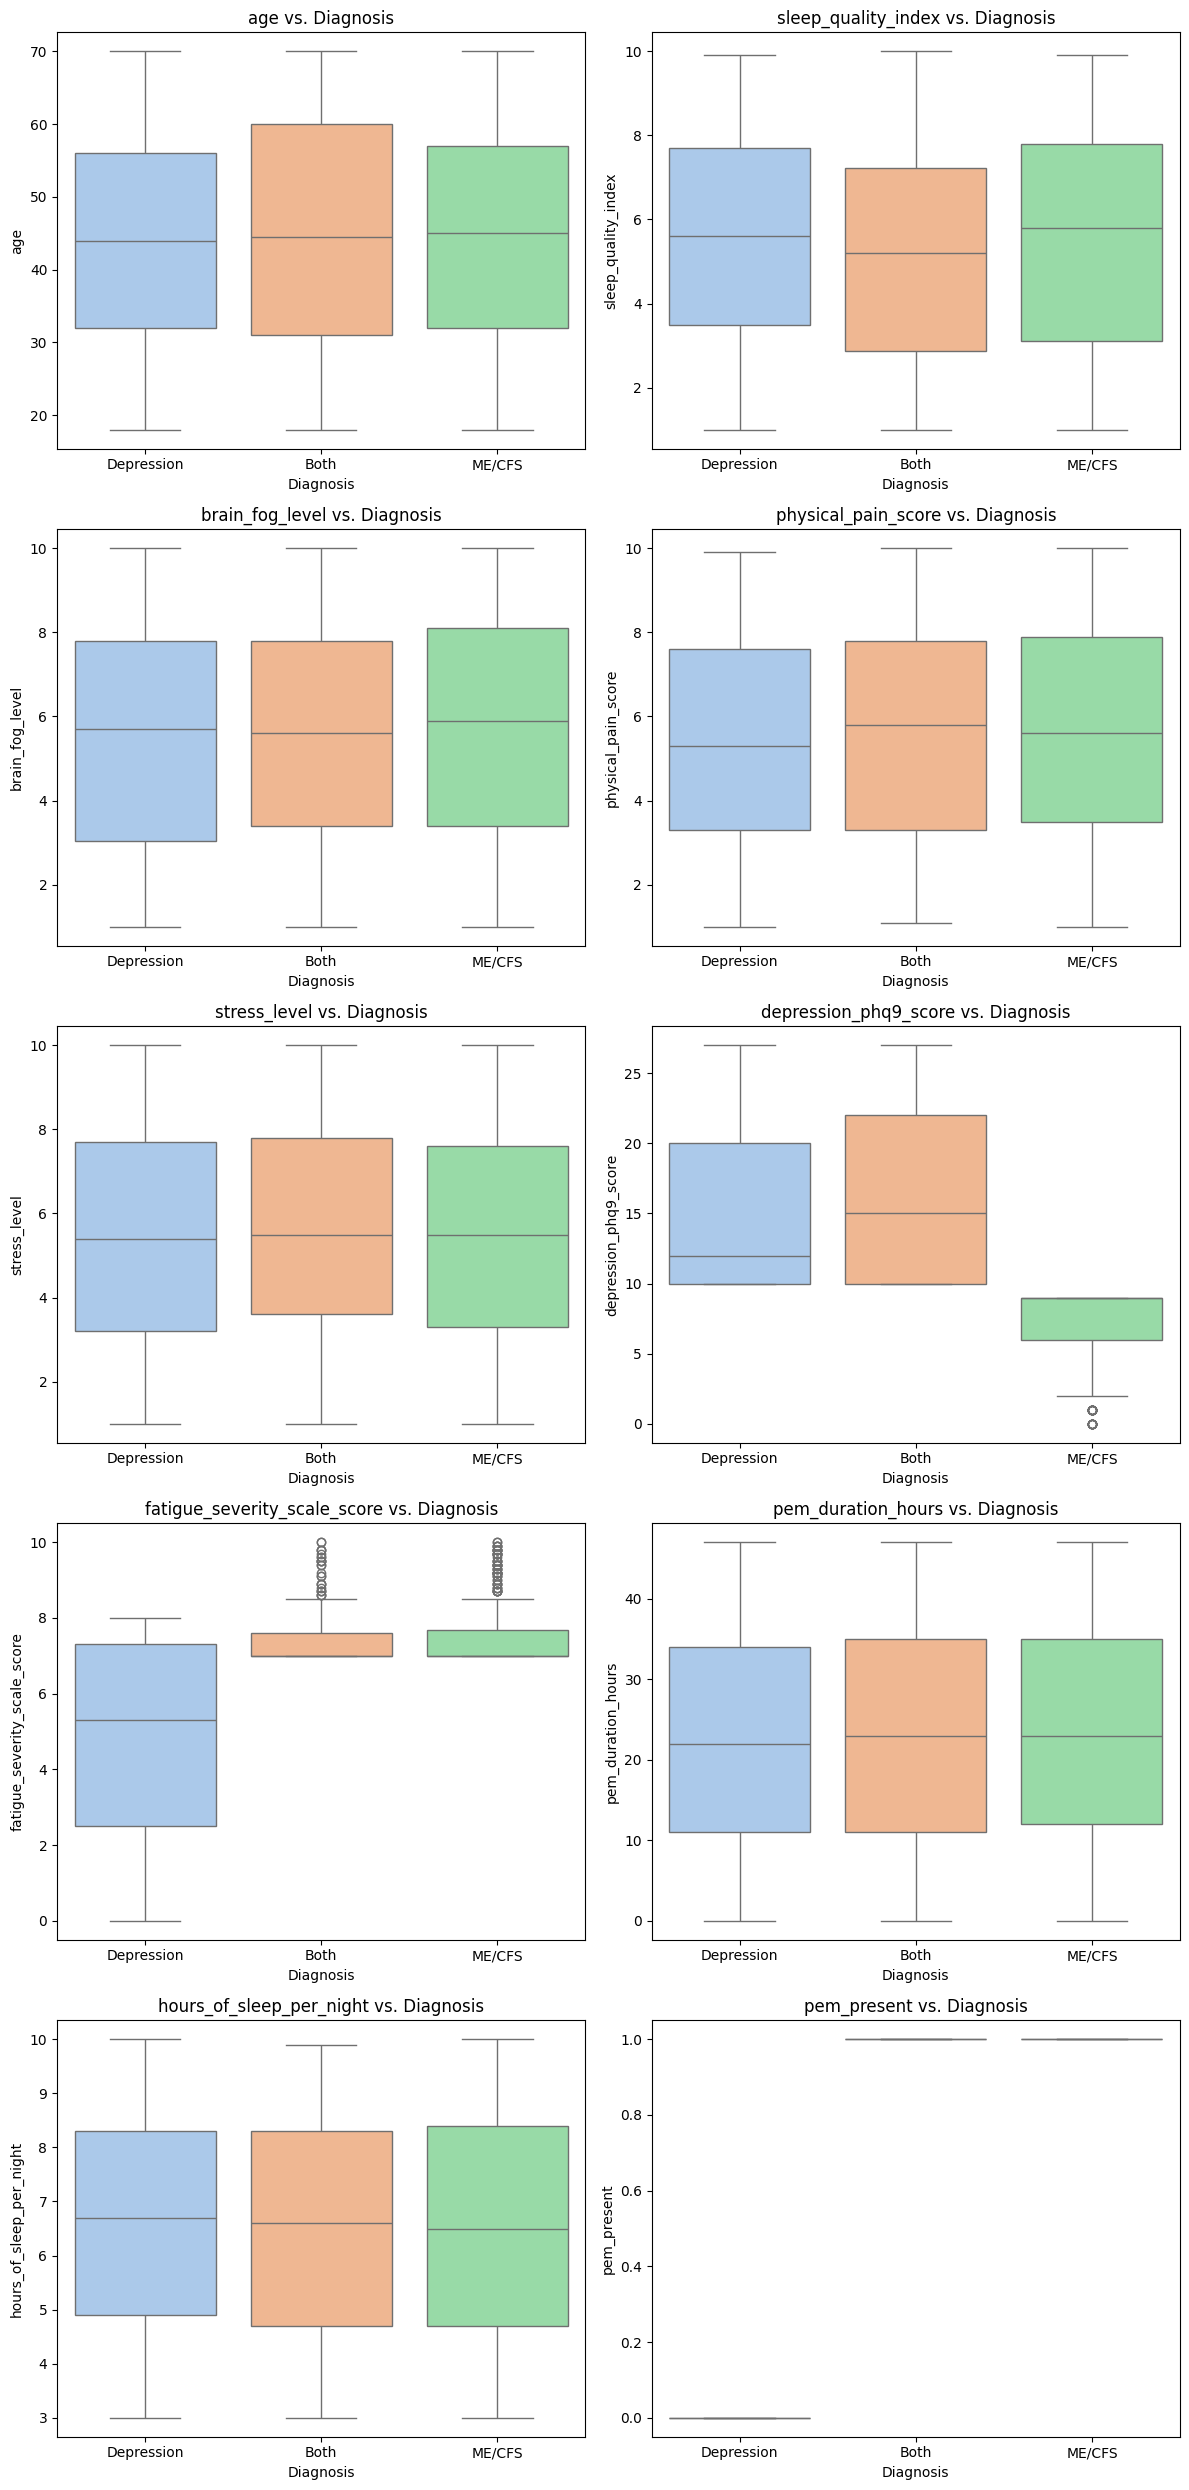

In [43]:
n_cols = 2 
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols


fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x='diagnosis', y=col, ax=axes[i], palette='pastel')
    axes[i].set_title(f'{col} vs. Diagnosis')
    axes[i].set_xlabel('Diagnosis')
    axes[i].set_ylabel(col)


for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Nhận xét:

Dựa vào đồ thị giữa depression_phq9_score và diagnosis thang điểm PHQ-9 đánh giá trầm cảm càng cao càng dễ mắc bệnh trầm cảm hoặc cả 2 bệnh còn thấp thì mắc viêm não cho thấy ảnh hưởng depression_phq9_score đối với trầm cảm rất lơn vì mắc cả 2 cũng là mắc trầm cảm ,bên viêm não xuất hiện 1 số outliers nhỏ.

Dựa vào đồ thị giữa physical_pain_score và diagnosis nếu điểm đau thể chất nhỏ không thể nào bị mắc bệnh viêm não được còn giá trị nào thì cũng có thể bị trầm cảm ,cả 2 và phần viêm não có 1 số outliers cao bất thường.

Dựa vào đồ thị giữa pem_present và diagnosis thì nếu mà bị pem thì chắc chắn bị viêm não còn không bị pem là không bị

Các biểu đồ khác phần bố tập chung đều cho thấy mức độ ảnh hưởng của giá trị như nhau


Biến số với categorical

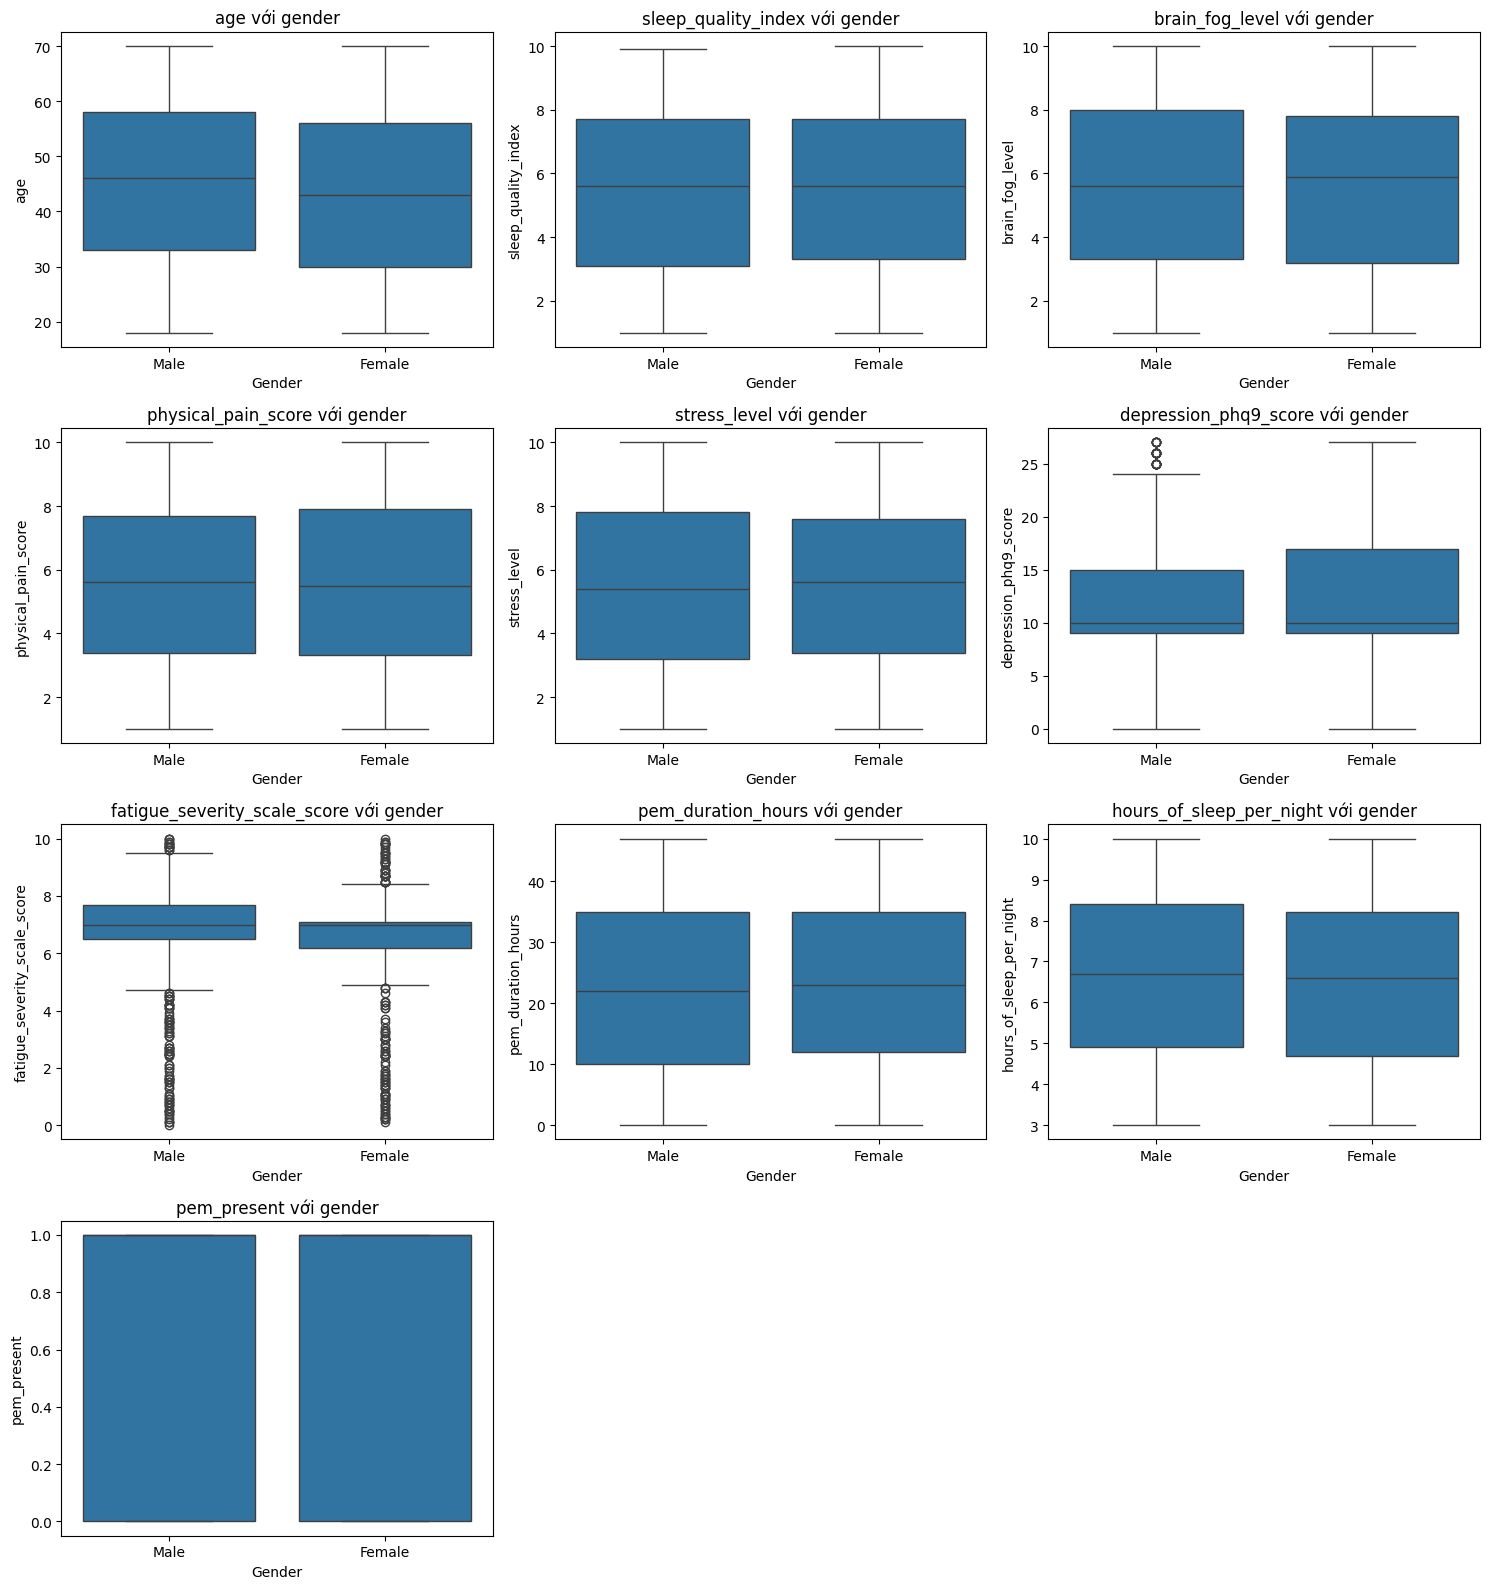

In [ ]:
num_cols = df.select_dtypes(include='number').columns
n = len(num_cols)

ncols = 3
nrows = (n + ncols - 1) // ncols

plt.figure(figsize=(5 * ncols, 4 * nrows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(x='gender', y=col, data=df)
    plt.title(f"{col} với gender")
    plt.xlabel("Gender")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

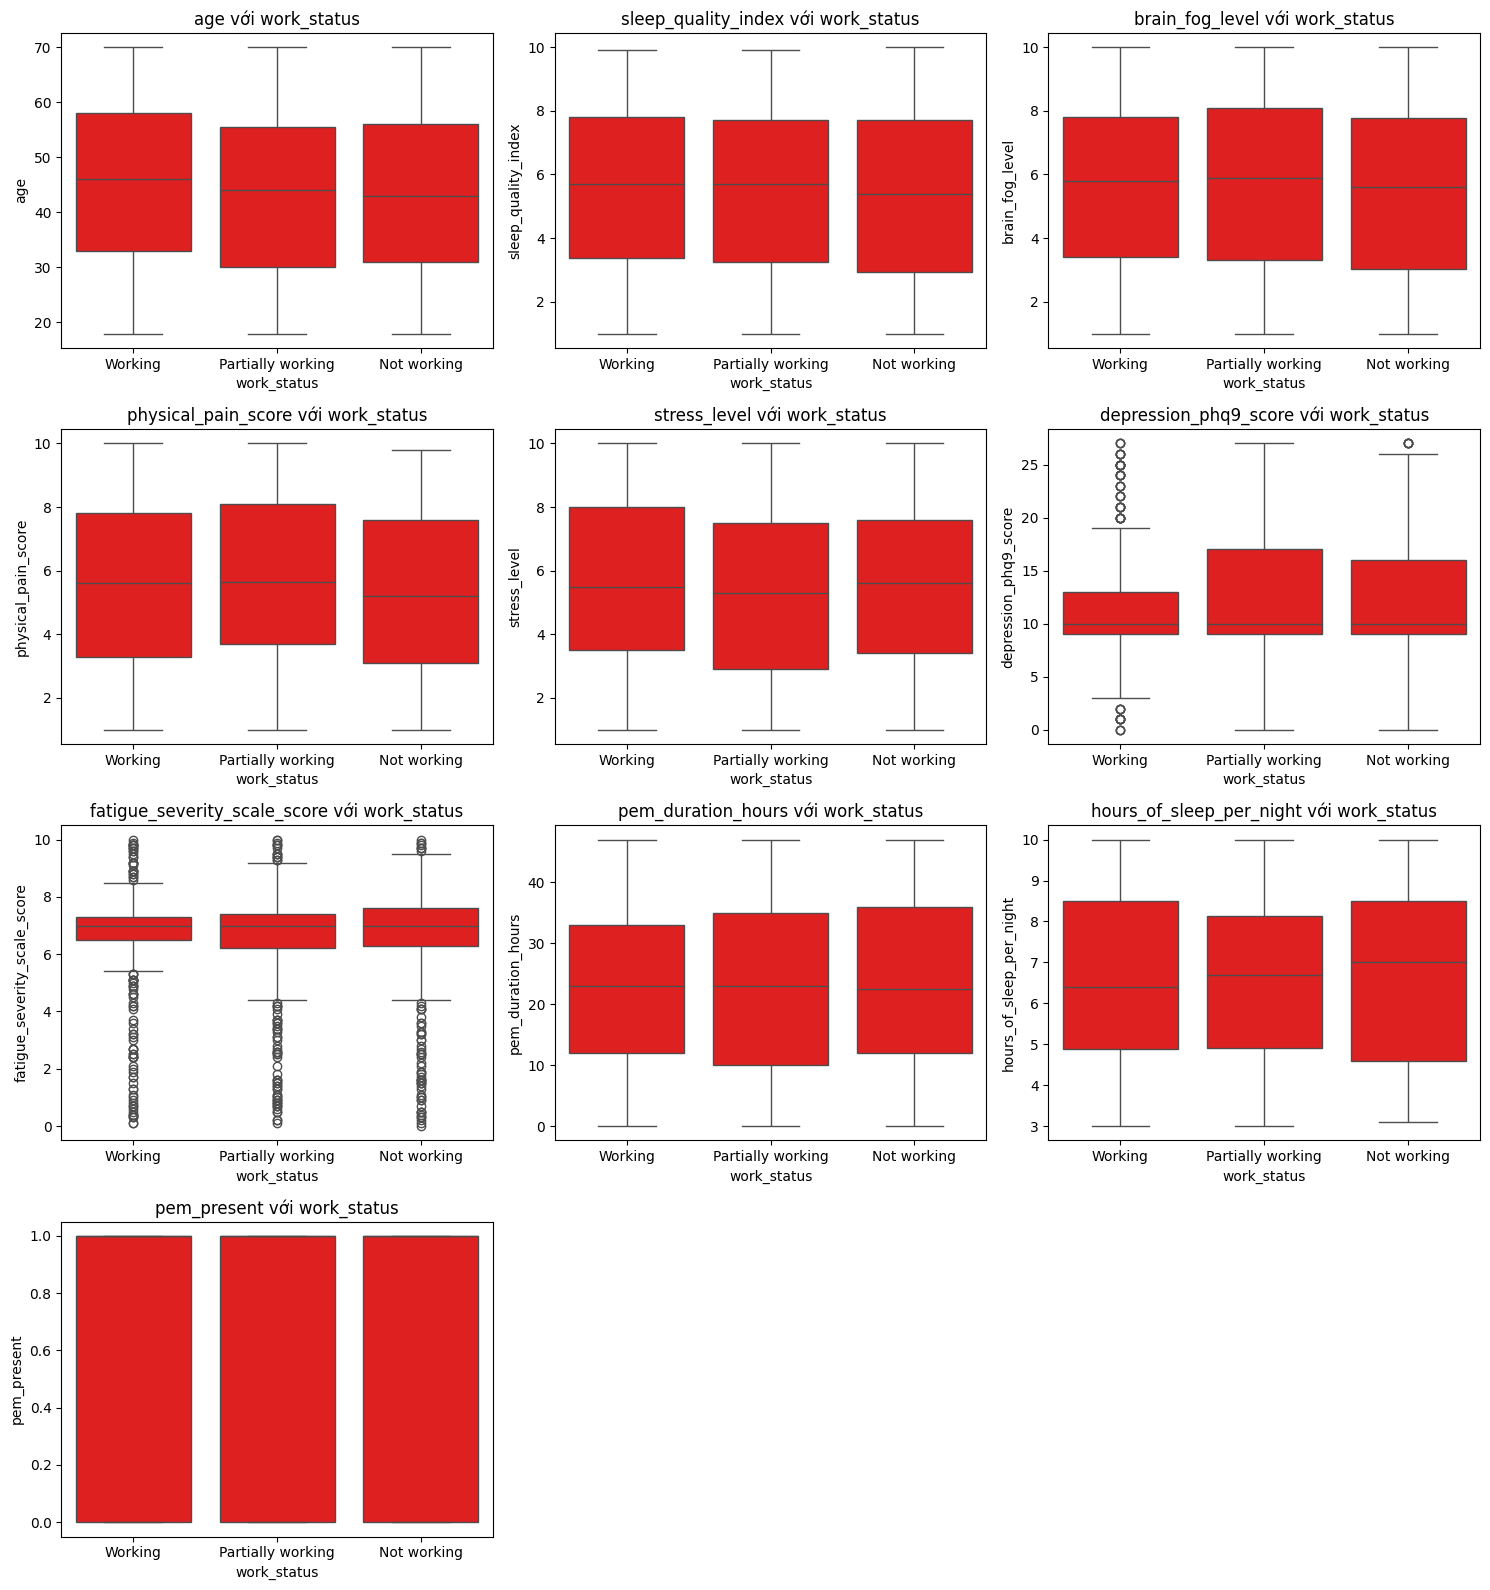

In [ ]:
num_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(5 * ncols, 4 * nrows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(x='work_status', y=col, data=df,color= "r")
    plt.title(f"{col} với work_status")
    plt.xlabel("work_status")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

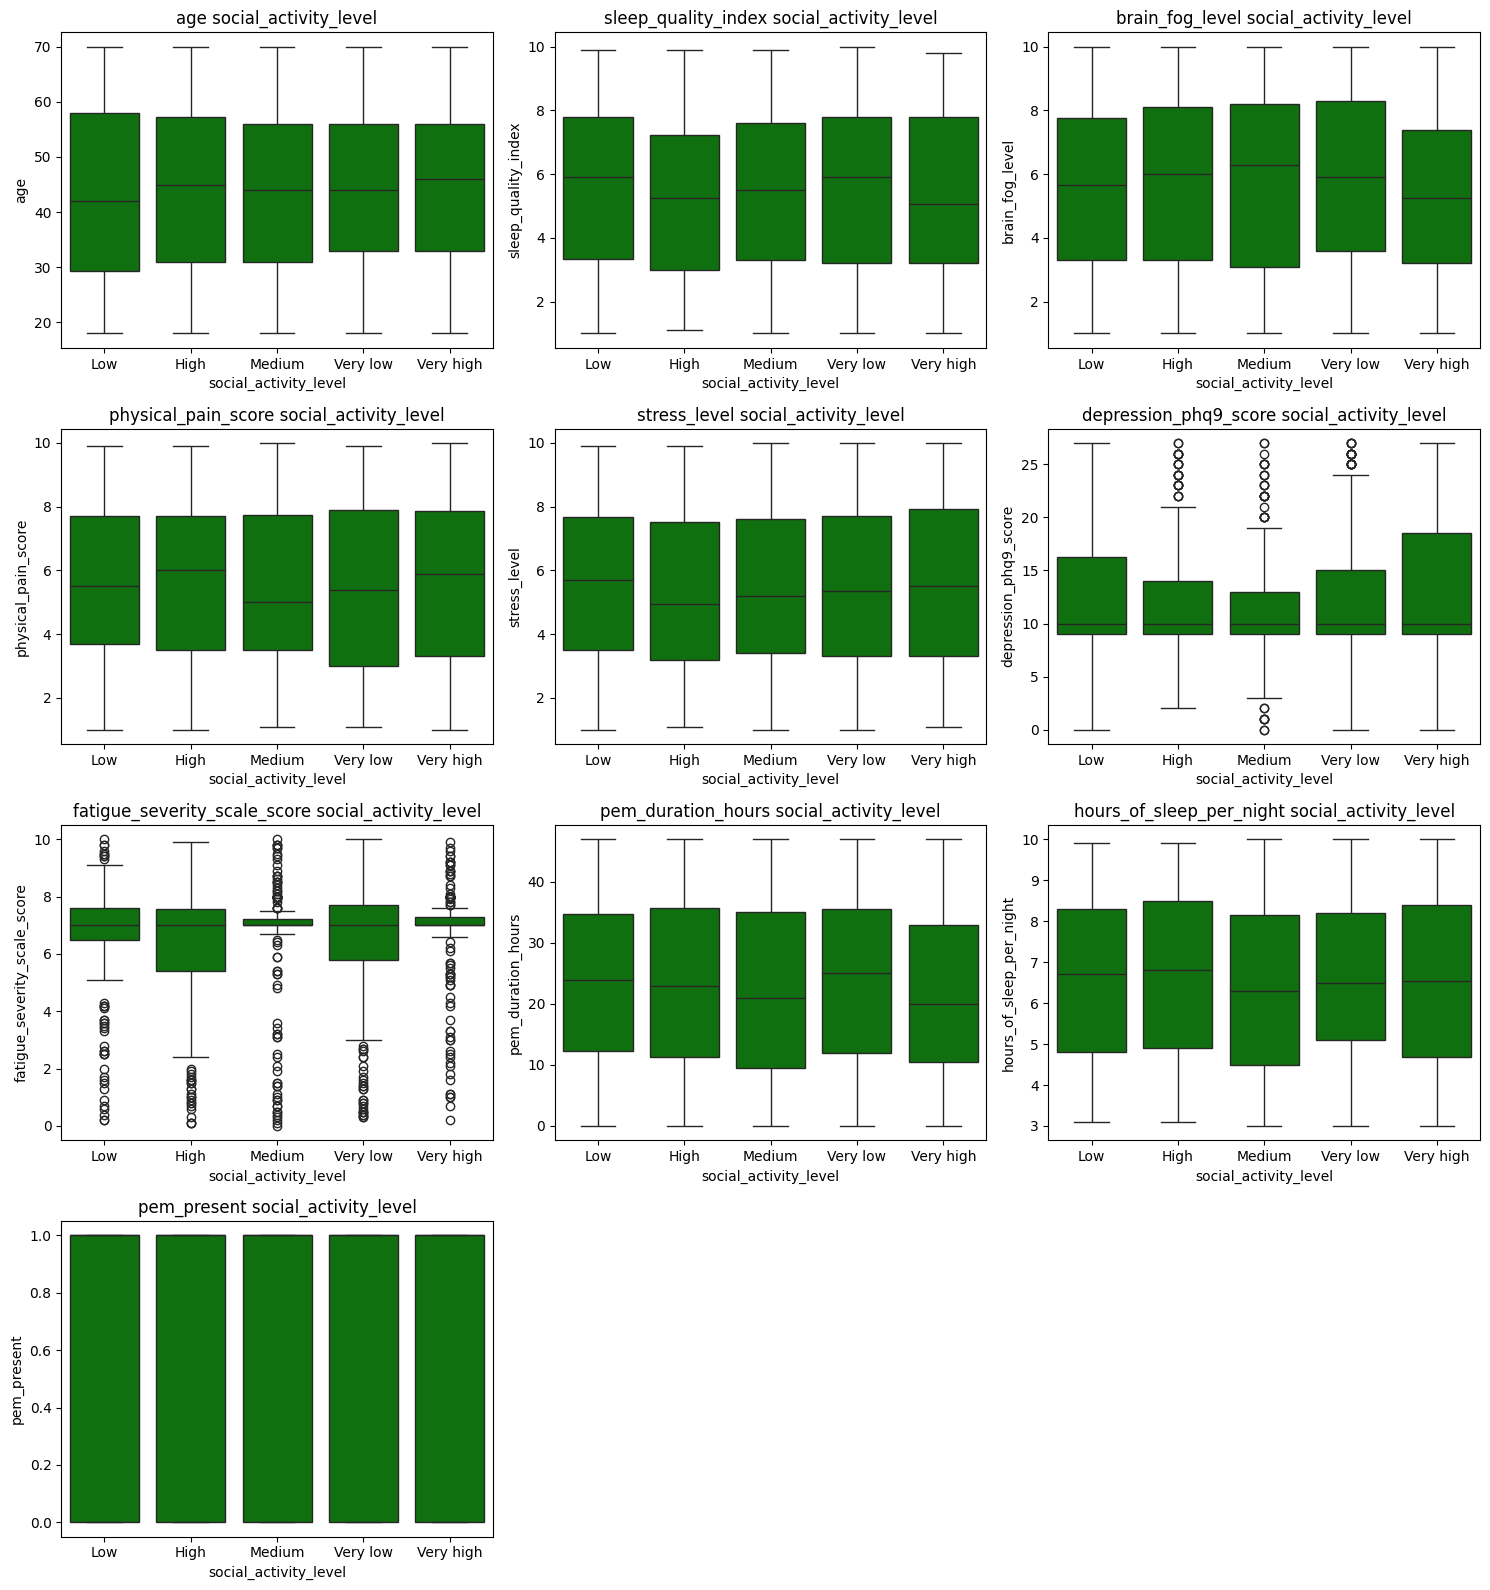

In [ ]:
num_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(5 * ncols, 4 * nrows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(x='social_activity_level', y=col, data=df,color= "green")
    plt.title(f"{col} social_activity_level")
    plt.xlabel("social_activity_level")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

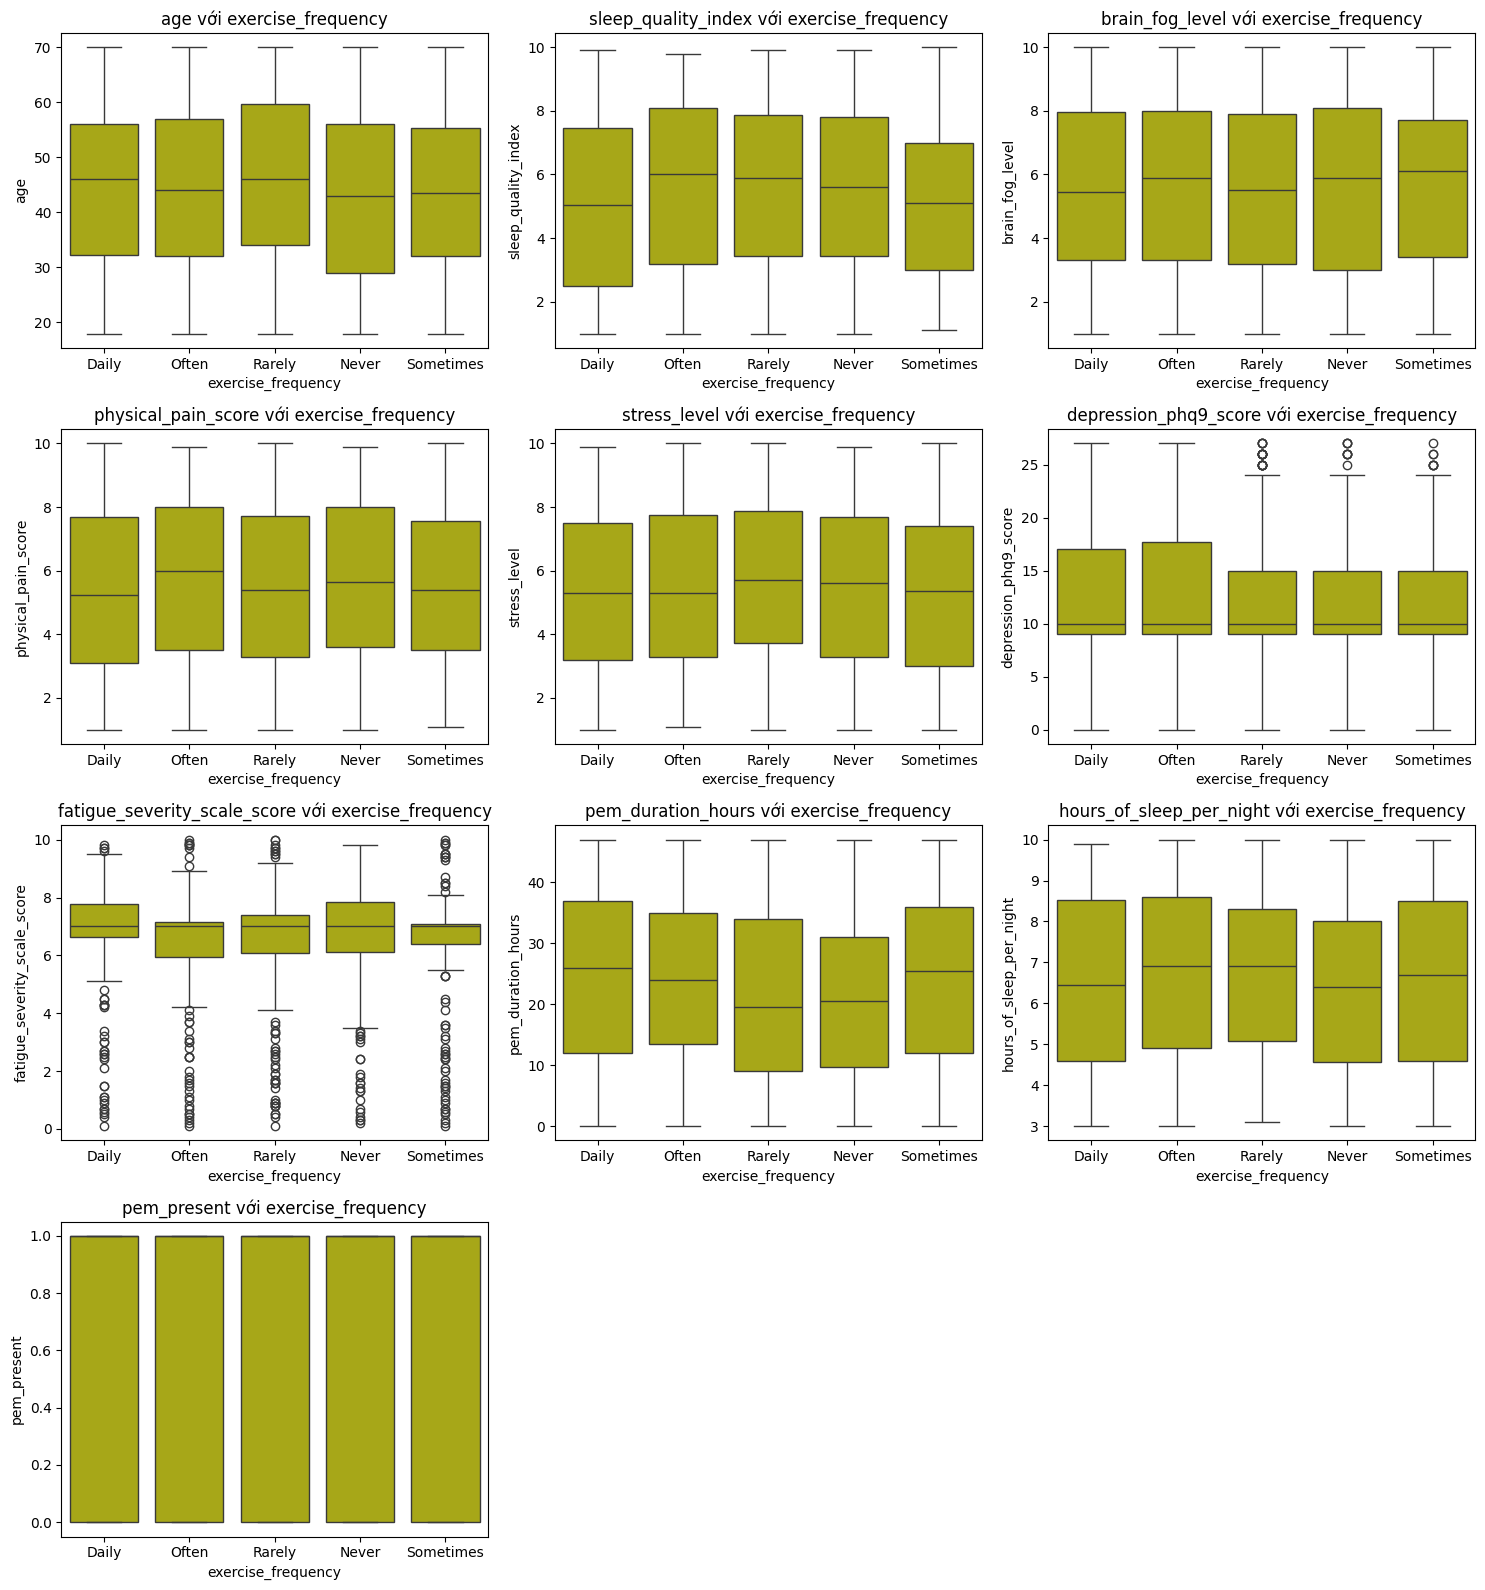

In [ ]:
num_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(5 * ncols, 4 * nrows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(x='exercise_frequency', y=col, data=df,color= "y")
    plt.title(f"{col} với exercise_frequency")
    plt.xlabel("exercise_frequency")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

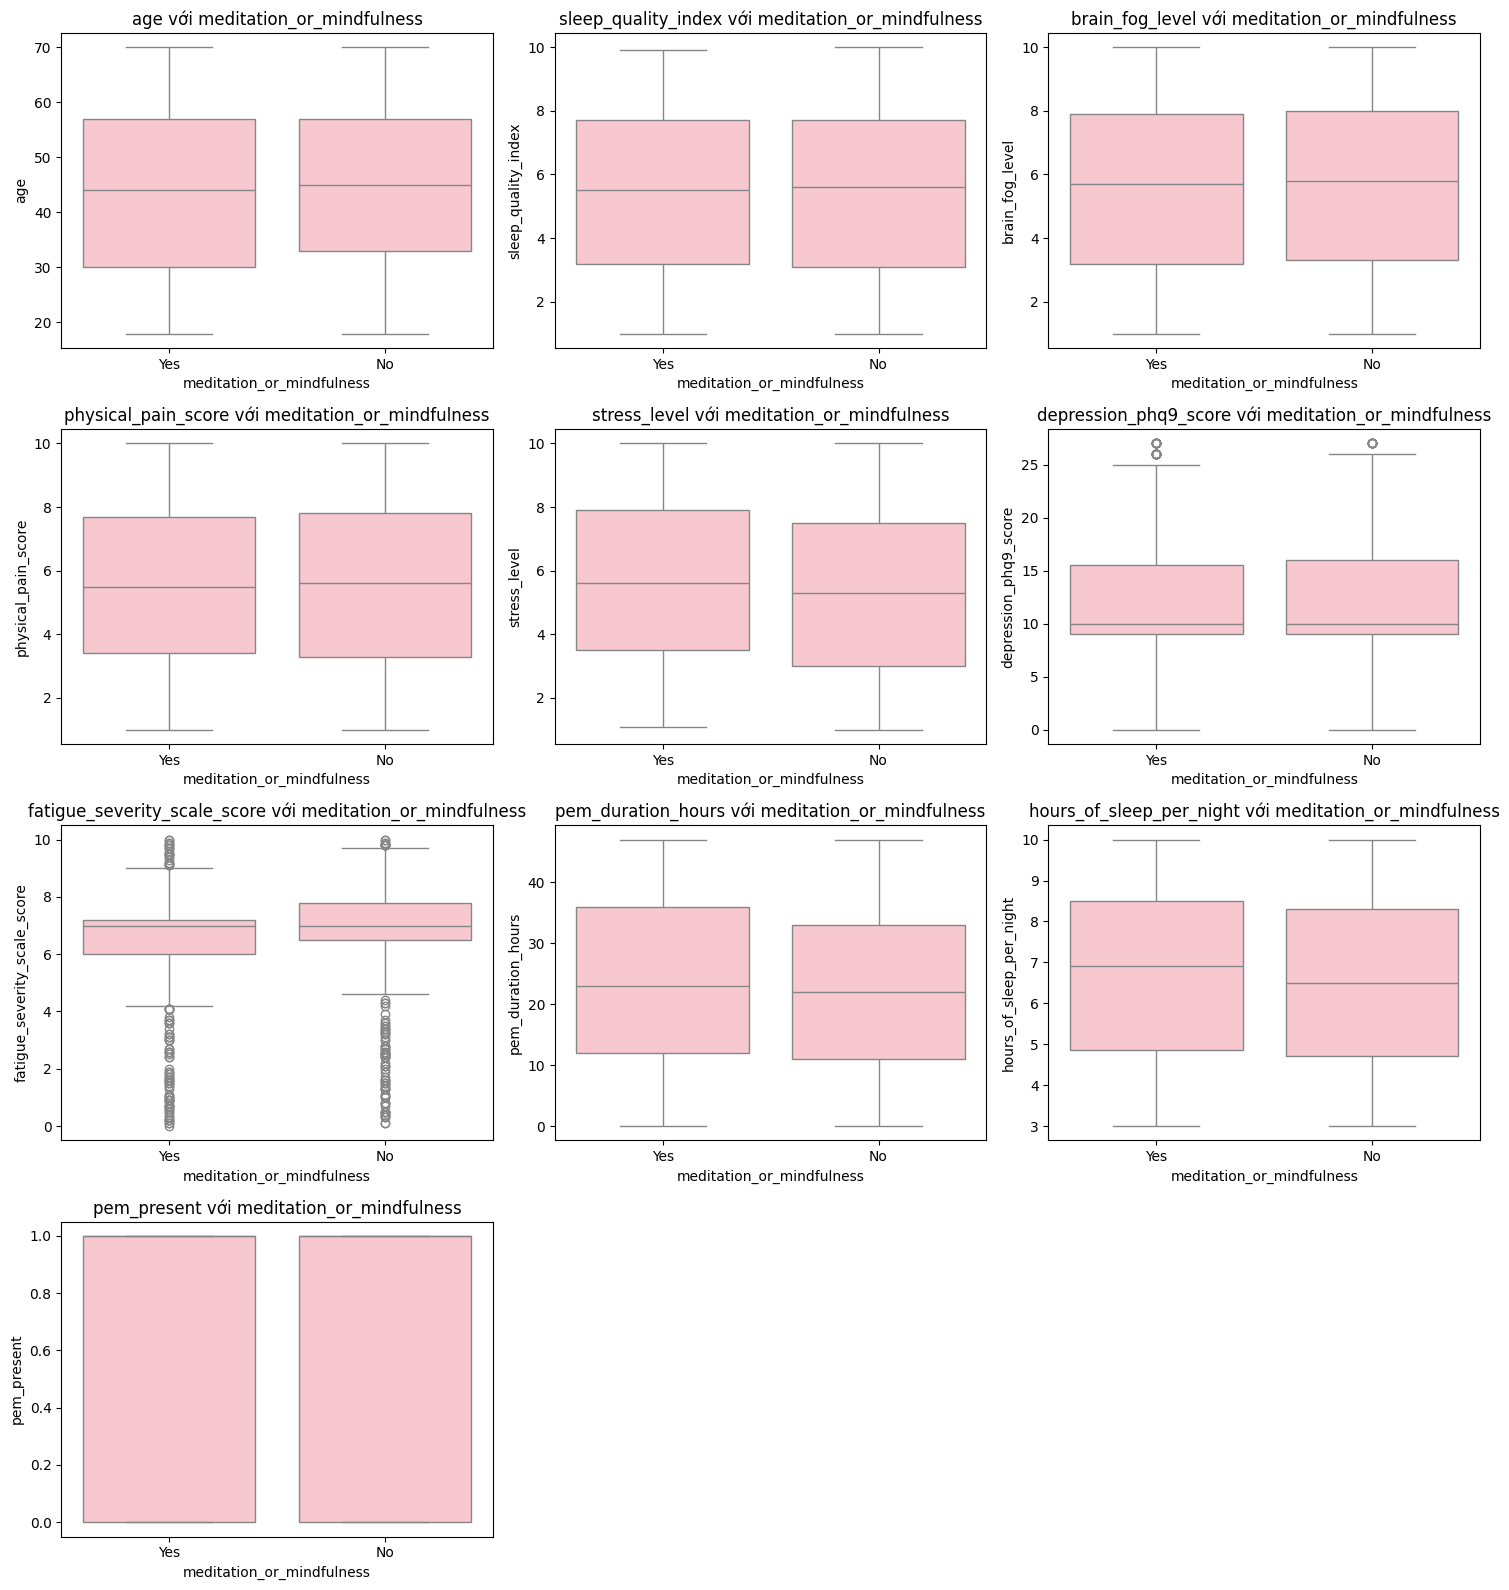

In [ ]:
num_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(5 * ncols, 4 * nrows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(x='meditation_or_mindfulness', y=col, data=df,color= "pink")
    plt.title(f"{col} với meditation_or_mindfulness")
    plt.xlabel("meditation_or_mindfulness")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Nhận xét:
- Dựa vào biểu đồ giữa các numerical và categorical cho thầy rằng hệ số fatigue_severity_scale_score và depression_phq9_score mặc dù phân bố trung vị của các giá trị categorical đều tương đương nhau không có khác biệt quá rõ nhưng có những ouliers cao hoặc nhỏ bất thường điều này ảnh hưởng trực tiếp dến dữ liệu.
- Các biểu đồ khác thì không có điểm bất thường các giá trị categorical đều tương đương nhau hầu như không có khác biệt.

### 4. Nhận xét và kết luận
- Tóm tắt các phát hiện quan trọng từ dữ liệu
- Những đặc trưng có thể ảnh hưởng lớn đến mô hình học máy
- Đề xuất mô hình phù hợp để áp dụng về sau

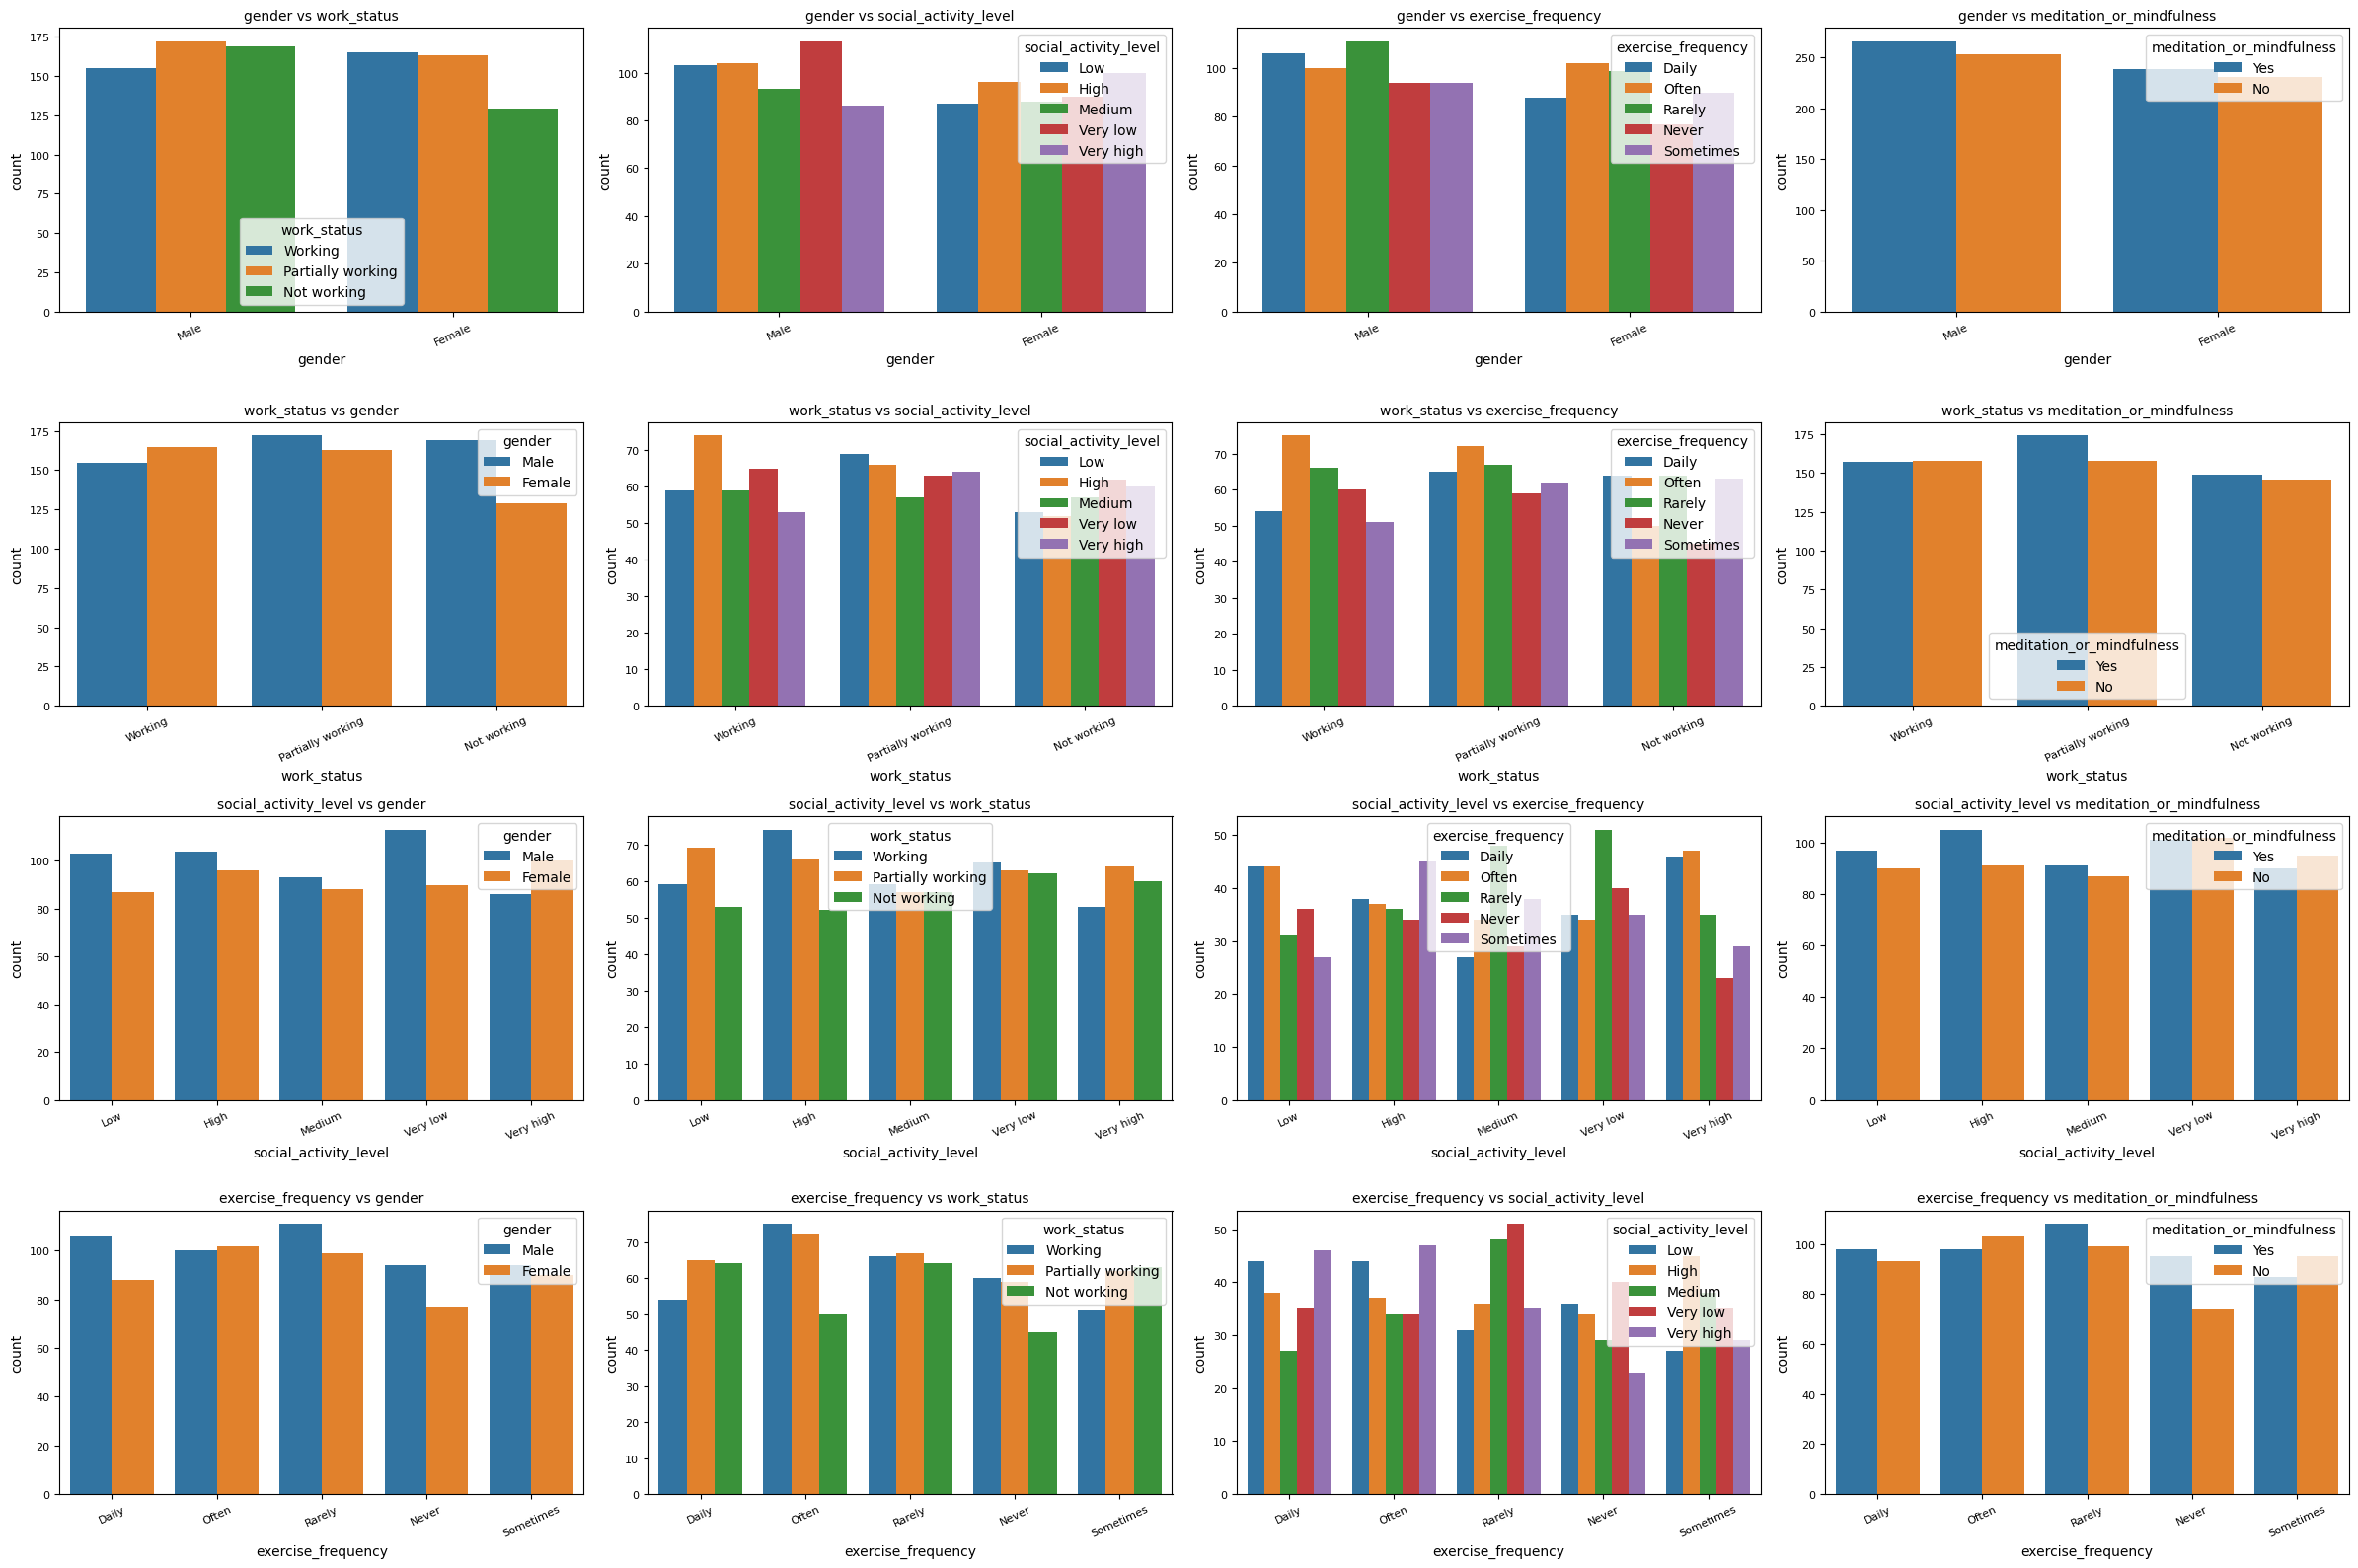

In [ ]:
cat_cols = [col for col in df.select_dtypes(include='object').columns if col != 'diagnosis']


pair_list = []
for x in cat_cols:
    others = [hue for hue in cat_cols if hue != x][:4]
    for hue in others:
        pair_list.append((x, hue))

pair_list = pair_list[:16]

nrows, ncols = 4, 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 4 * nrows))
axes = axes.flatten()

# Vẽ từng biểu đồ
for i in range(16):
    ax = axes[i]
    if i < len(pair_list):
        x, hue = pair_list[i]
        try:
            sns.countplot(x=x, hue=hue, data=df, ax=ax)
            ax.set_title(f"{x} vs {hue}", fontsize=10)
            ax.tick_params(axis='x', rotation=25, labelsize=8)
            ax.tick_params(axis='y', labelsize=8)
        except:
            ax.set_title(f"Lỗi: {x} vs {hue}")
            ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()


Nhận xét:
Ở hầu hết các biểu đồ thì viêm não và trầm cảm chiếm số lượng lớn nhất, thấp nhất là mắc cả 2 bệnh.

Tuy nhiên, các giá trị của các categorical khá cân bằng

Ý nghĩa:
Các giá trị của các categorical không phải là yếu tố phân loại quá mạnh cho diagnosis 





Nhận xét chung khi phân tích mối quan hệ :
- Dữ liệu có giá trị null ảnh hưởng ít đến việc phân tích
- Xuất hiện nhiều ouliers ảnh hưởng đến giá trị của các feature
- Có những mỗi quan hệ ảnh hưởng với tương quan mạnh và yếu

Giải pháp:
- Drop giá trị null
- Thêm các cột thiếu bằng median hoặc mean 
- chuyển đổi các giá trị chữ sang số
- Xử lí những giá trị ouliers bằng cách giới hạn
- Có thể bỏ bớt 1 số feature không liên quan 
    
Định hướng học máy: RandomForestClassifier
- Là bài toán phân loại
- Dữ liệu khá phức tạp không có sự tuyến tính
- Biến số và biến phân loại phức tạp
- Chống overfitting tốt hơn
- Tự động chọn đặc trưng quan trọng





### 5. Bài học
Những điều chúng em học được khi làm project này:
- Hiểu rõ hơn về quy trình phân tích dữ liệu như xử lý, khám phá dữ liệu.
- Cải thiện khả năng trực quan hoá dữ liệu để hiểu rõ hơn về mối liên hệ giữa các yếu tố.

Những lỗi từng gặp phải và cách xử lý:
- Thiếu dữ liệu (missing values): Nhiều dòng bị khuyết dữ liệu quan trọng có thể dùng dropna() hoặc thay thế bằng trung bình/giá trị phổ biến.

Gợi ý mở rộng trong tương lai:
- Áp dụng vào huấn luyện các mô hình machine learning và deep learning để chuẩn đoán bệnh.
- Thu thập thêm dữ liệu từ nhiều nguồn để tăng tính khái quát.
- Triển khai hệ thống dự đoán theo thời gian thực, ví dụ: một ứng dụng tự đánh giá sức khoẻ tinh thần.
- Tích hợp thêm dữ liệu từ thiết bị đeo tay (wearables) như nhịp tim, giấc ngủ để tăng độ chính xác.

### 6. Phụ lục
- Link dataset: https://www.kaggle.com/datasets/storytellerman/mecfs-vs-depression-classification-dataset
- Tài liệu tham khảo:
